# **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas)

**Created by:** Vinícius Albano ([@vinialbano](https://github.com/vinialbano)) - CP3013677

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

<span style='font-size: 2.5em'><b>São Paulo Real Estate 🏡</b></span><br/>
<span style='font-size: 1.5em'>Predict the sale/rent price of apartments in the city of São Paulo, Brazil.</span>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Bandeira_da_cidade_de_S%C3%A3o_Paulo.svg/320px-Bandeira_da_cidade_de_S%C3%A3o_Paulo.svg.png">

---



## 0. Imports and default settings for plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 150)

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 🔲 1. Frame the Problem

### 📄 1.1. Context

In Brazil, the realtor is the professional responsible for defining the value of an apartment. If the place to be sold is advertised through a real estate agent, this valuation and pricing service is free. Otherwise, you have to pay for it.

On the website of the Regional Council of Real Estate Brokers of São Paulo (CRECISP) there is a list with the cost of fees. The list informs, for example, that in case of sale of an urban residential property, the commission must be of 6% to 8%. In the case of market valuation only, it is customary to charge 1% of the property's value for a written appraisal and a verbal opinion costs at least one annual fee from CRECISP, which in 2021 is 652 reais[1][2][3].

When we talk about the rental value of an apartment, several factors influence it, such as size, infrastructure and location. Homeowners or brokers typically search for other similar properties in the area to help estimate market value. It is also possible to start considering a percentage between 0.3% and 0.5% of the property's sale value. This amount does not include taxes such as IPTU and condominium.[4]

The use of Machine Learning techniques can help improve estimates of the sale and rent values ​​of apartments in Brazil, in addition to reducing costs for the consumer. Our goal is to assist in this task.

**References:** <br/>
[1] Estadão Imóveis: Quanto vale meu apê? Descubra como calcular o potencial de venda do seu imóvel - https://imoveis.estadao.com.br/investir-imoveis/quanto-vale-meu-ape-descubra-como-calcular-o-potencial-de-venda-do-seu-imovel/ (accessed on 2021-11-02).<br/>
[2] Imovelweb: Como descobrir quanto vale o seu imóvel - https://www.imovelweb.com.br/noticias/mercado-imobiliario/como-descobrir-quanto-vale-o-seu-imovel/  (accessed on 2021-11-02).<br/>
[3] CRECISP: Anuidade com desconto até 15/01 - https://www.crecisp.gov.br/comunicacao/noticiasinterna/7592-anuidade-com-desconto-ate-15-01 (accessed on 2021-11-02). <br/>
[4] Zimobi: Quanto cobrar de aluguel? Saiba como calcular - https://www.zimobi.com.br/quanto-cobrar-de-aluguel/ (accessed on 2021-11-02). <br/>

### 🧠 1.2. Challenge

#### 🎯 **Objective:**
**Build a machine learning solution to automatically predict the apartment rent and sales prices in the city of São Paulo.** <br/>
These predictions will be used to determine whether it is worth investing in a given area or not.

#### **Baseline:**
Our dataset does not contain much information about the process, so we will consider that the **apartment prices** are estimated ***manually by experts***: a team gathers up-to-date information about an apartment and finds out the `Price`. 
Since is _costly_ and _time-consuming_, we will consider that **their estimates are off by more than 20%**.

#### **Solution Planning:**
- **Regression problem**
- Metrics:
    - R²
    - Root Mean Squared Error (RMSE)
- Data sources:
    - [São Paulo Real Estate - Sale/Rent - April 2019](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019)
- No assumptions
- Project deliverable:
    - A simple exploratory data analysis
    - **A ML system/model** launched in _production_ <br/><br/>

## 💽 2. Get the Data

The considered dataset contains information on 13,000 apartments for sale and rent in the city of São Paulo, Brazil. It represents properties advertised in April 2019, whose data came from various sources, especially real estate classifieds websites.

As the dataset is not recent, it **should not** be used to predict current prices for rent/sale of apartments in São Paulo; more recent data should be used instead. However, it is excellent for learning and simulating a real case.

This dataset does not have legal obligations and sensitive information.

### 2.1. Download the Data

We previously downloaded the dataset from this [Kaggle repository](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019). However, we could use pandas to read such a remote file directly.

### 2.2. Load the Data

In [2]:
import pandas as pd
df = pd.read_csv('./datasets/sao-paulo-properties-april-2019.csv')

In [3]:
df.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0    930    220    47      2        2       1        1         0          0   
1   1000    148    45      2        2       1        1         0          0   
2   1000    100    48      2        2       1        1         0          0   
3   1000    200    48      2        2       1        1         0          0   
4   1300    410    55      2        2       1        1         1          0   

   Swimming Pool  New               District Negotiation Type Property Type  \
0              0    0  Artur Alvim/São Paulo             rent     apartment   
1              0    0  Artur Alvim/São Paulo             rent     apartment   
2              0    0  Artur Alvim/São Paulo             rent     apartment   
3              0    0  Artur Alvim/São Paulo             rent     apartment   
4              0    0  Artur Alvim/São Paulo             rent     apartment   

    Latitude  Longitude  
0 -23.543138 -46.479486  
1 -23.550239 -46.480718  
2 -23.542818 -46.485665  
3 -23.547171 -46.483014  
4 -23.525025 -46.482436

### 2.3. Take a quick look at the data structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

Each row corresponds to an apartment available for sale or rent.

Each apartment is represented by **16 attributes** (9 numeric and 7 categorical).

* Apartment's location: `District`, `Latitude`, `Longitude`.
* `Price`: Advertised price of the apartment (measured in Brazilian Real).
* `Condo`: Comdominium expenses (unknown values are marked as zero).
* `Size`: The property size (measured in Square Meters).
* `Rooms`: Total number of bedrooms.
* `Toilets`: Total number of toilets.
* `Parking`: Number of parking spots.
* `Elevator`: Whether there is an elevator in the building, or not (binary values).
* `Furnished`: Whether the property is furnished, or not (binary values).
* `Swimming Pool`: Whether the property has a swimming pool, or not (binary values).
* `New`: Whether the property was built recently, or not (binary values).
* `Negotiation Type`: If it is available for sale or for rent.
* `Property Type`: The type of the property.

There are **13640 instances** in the dataset, with **no missing features**.

In [5]:
df.describe()

Price         Condo          Size         Rooms       Toilets  \
count  1.364000e+04  13640.000000  13640.000000  13640.000000  13640.000000   
mean   2.877378e+05    689.882331     84.373900      2.312023      2.073680   
std    5.908214e+05    757.649363     58.435676      0.777461      0.961803   
min    4.800000e+02      0.000000     30.000000      1.000000      1.000000   
25%    1.858750e+03    290.000000     50.000000      2.000000      2.000000   
50%    8.100000e+03    500.000000     65.000000      2.000000      2.000000   
75%    3.600000e+05    835.000000     94.000000      3.000000      2.000000   
max    1.000000e+07   9500.000000    880.000000     10.000000      8.000000   

             Suites       Parking      Elevator     Furnished  Swimming Pool  \
count  13640.000000  13640.000000  13640.000000  13640.000000    13640.00000   
mean       0.980792      1.393182      0.354179      0.146774        0.51217   
std        0.834891      0.829932      0.478281      0.353894        0.49987   
min        0.000000      0.000000      0.000000      0.000000        0.00000   
25%        1.000000      1.000000      0.000000      0.000000        0.00000   
50%        1.000000      1.000000      0.000000      0.000000        1.00000   
75%        1.000000      2.000000      1.000000      0.000000        1.00000   
max        6.000000      9.000000      1.000000      1.000000        1.00000   

                New      Latitude     Longitude  
count  13640.000000  13640.000000  13640.000000  
mean       0.015616    -22.077047    -43.597088  
std        0.123988      5.866633     11.487288  
min        0.000000    -46.749039    -58.364352  
25%        0.000000    -23.594552    -46.681671  
50%        0.000000    -23.552813    -46.637255  
75%        0.000000    -23.517640    -46.560040  
max        1.000000      0.000000      0.000000

In [6]:
# Fixing data types
df['Elevator'] = df['Elevator'].astype('bool')
df['Furnished'] = df['Furnished'].astype('bool')
df['Swimming Pool'] = df['Swimming Pool'].astype('bool')
df['New'] = df['New'].astype('bool')

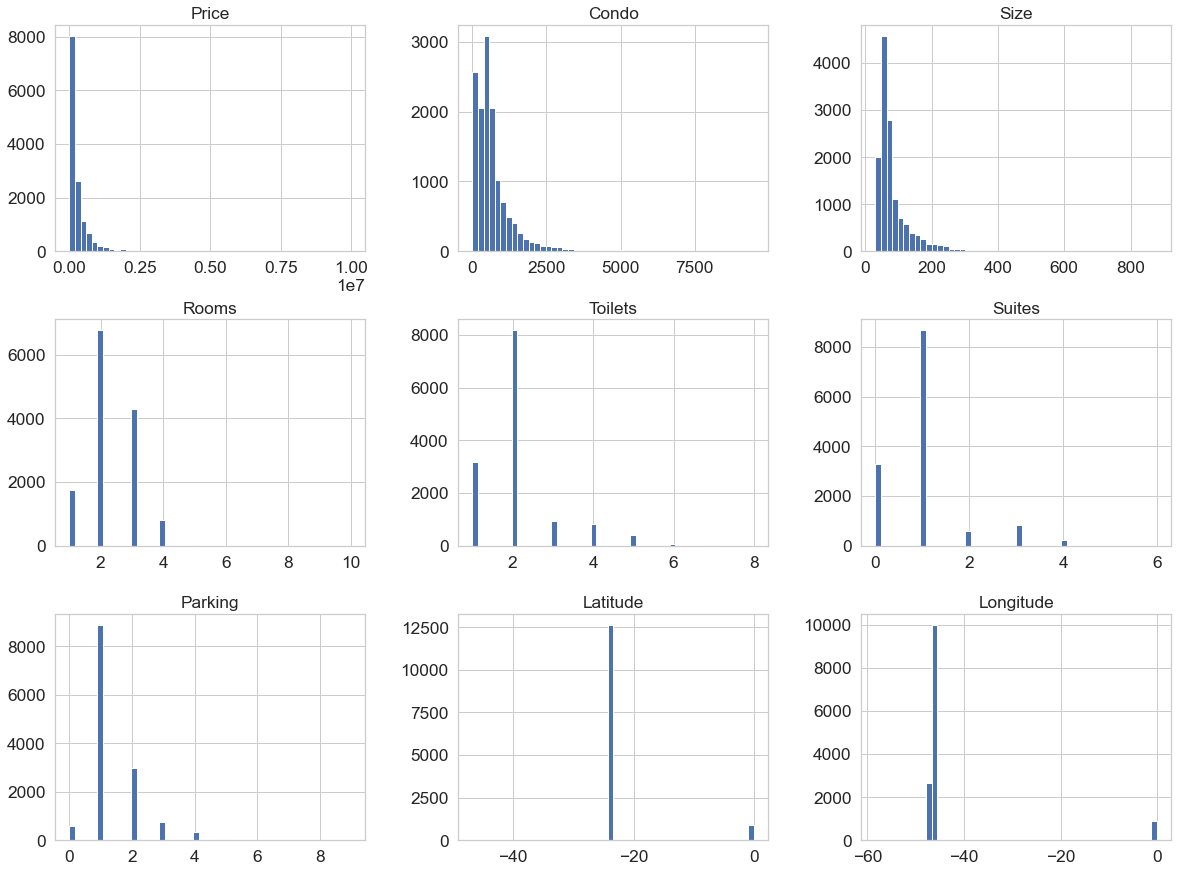

In [7]:
# plot a histogram for each numeric attribute from the database
df.hist(bins=50, figsize=(20,15))
display()

1. The price range is huge, varying from a near-zero value to about R$ 1 million. It may be due to the `Negotiation Type` variable, since **some prices refer to a rent value and others refer to sale**. We need to check this variable in more details.

2. According to the [São Paulo Environmental System](http://datageo.ambiente.sp.gov.br/geoportal/catalog/search/resource/details.page?uuid=%7B10787319-DEDC-42F7-BB0A-36CA918C4B82%7D), the geographic coordinates of the city varies inside the following ranges:
* West Longitude: -46.84
* East Longitude: -46.36
* North Latitude: -23.36
* South Latitude: -24.00

We can see that there are some **outliers in the `Latitude` and `Longitude` attributes**, since some instances have values close to or equal to zero. There may be other incorrect values as well.

3. The variables `Elevator`, `Furnished`, `Swimming Pool` and `New` are boolean. We might transform them to categorical if necessary.

4. The numerical attributes have very different scales.

5. Many histograms are _tail-heavy_.

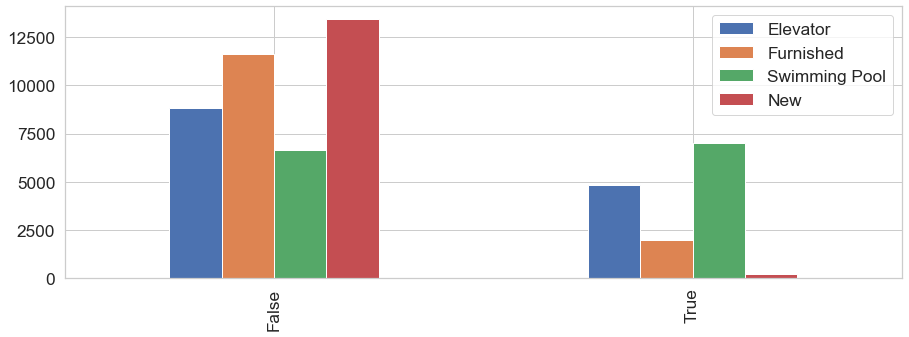

In [8]:
# plot a barplot for each boolean attribute from the database
df[['Elevator', 'Furnished', 'Swimming Pool', 'New']].apply(pd.value_counts).plot.bar()
display()

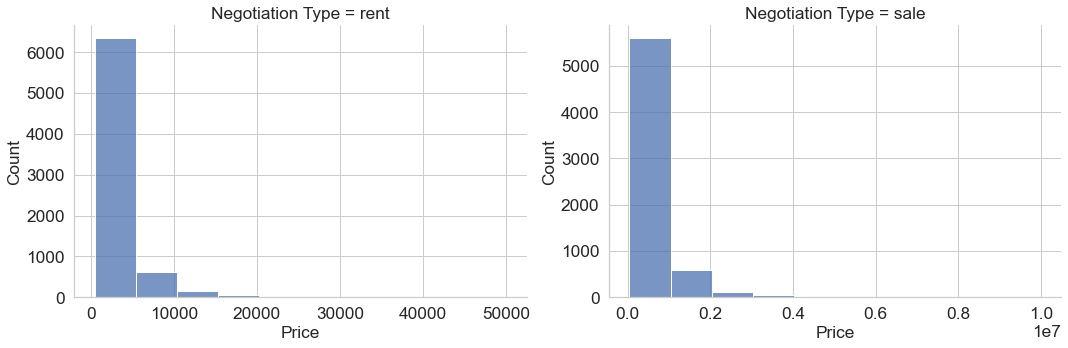

In [9]:
# Checking the price range difference between Negotiation Types
g = sns.FacetGrid(df, col='Negotiation Type', sharex=False, sharey=False, height=5, aspect=1.5)
g.map_dataframe(sns.histplot, x='Price', bins=10)
display()

As expected, there is a big difference of prices between the apartments for rent and for sale. We need to consider this when we are creating our models.

In [10]:
# Describing the non-numerical features
df.describe(include='object')

District Negotiation Type Property Type
count             13640            13640         13640
unique               96                2             1
top     Moema/São Paulo             rent     apartment
freq                293             7228         13640

The `Property Type` attribute contains only one value that is "apartment". We are able to exclude this feature from the dataset.

In [11]:
# Checking for problems with the District attributes
df['District'].unique()

array(['Artur Alvim/São Paulo', 'Belém/São Paulo', 'Cangaíba/São Paulo',
       'Carrão/São Paulo', 'Cidade Líder/São Paulo',
       'Cidade Tiradentes/São Paulo', 'Ermelino Matarazzo/São Paulo',
       'Iguatemi/São Paulo', 'Itaim Paulista/São Paulo',
       'Itaquera/São Paulo', 'Jardim Helena/São Paulo',
       'José Bonifácio/São Paulo', 'Lajeado/São Paulo',
       'Parque do Carmo/São Paulo', 'Penha/São Paulo',
       'Ponte Rasa/São Paulo', 'Sapopemba/São Paulo',
       'São Lucas/São Paulo', 'São Mateus/São Paulo',
       'São Miguel/São Paulo', 'São Rafael/São Paulo',
       'Tatuapé/São Paulo', 'Vila Curuçá/São Paulo',
       'Vila Formosa/São Paulo', 'Vila Jacuí/São Paulo',
       'Vila Matilde/São Paulo', 'Vila Prudente/São Paulo',
       'Cambuci/São Paulo', 'Campo Belo/São Paulo',
       'Campo Grande/São Paulo', 'Campo Limpo/São Paulo',
       'Capão Redondo/São Paulo', 'Cidade Ademar/São Paulo',
       'Cidade Dutra/São Paulo', 'Cursino/São Paulo', 'Grajaú/São Paulo',
  

It seems that all the `Districts` have the text "/São Paulo" in the end. We are able to remove that, since it's just noise.

### 2.4. Checking for duplicated samples

In [12]:
df.duplicated().any()

True

There are duplicated samples (rows) in our dataset. We should remove these samples in order to not add redundancy to our model.

Let's check some information about these rows:

In [13]:
df[df.duplicated()].head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
165   1300    387    50      2        2       1        1     False      False   
203    999      0    70      2        2       1        1     False      False   
204    888      0    70      2        2       1        1     False      False   
207   8000   1400   132      3        2       1        1     False      False   
208   8000   1400   132      3        2       1        1     False      False   

     Swimming Pool    New                      District Negotiation Type  \
165          False  False   Cidade Tiradentes/São Paulo             rent   
203          False  False  Ermelino Matarazzo/São Paulo             rent   
204          False  False  Ermelino Matarazzo/São Paulo             rent   
207          False  False            Iguatemi/São Paulo             rent   
208          False  False            Iguatemi/São Paulo             rent   

    Property Type   Latitude  Longitude  
165     apartment -23.582576 -46.417478  
203     apartment -23.494694 -46.478125  
204     apartment -23.494694 -46.478125  
207     apartment -23.585672 -46.681216  
208     apartment -23.585672 -46.681216

In [14]:
# Checking the total duplicated rows
len(df[df.duplicated()])

319

**There are 319 duplicated samples**. We must remove them in our cleaning phase.

### 2.5. Removing useless information

Before we start a deeper analysis of our dataset and create a model, let's remove some redundancy.

* Remove the `Property Type` attribute, since it is unique for the whole dataset.
* Remove the duplicated rows, since they won't add any value for our study.
* Crop the `District` attribute, removing the unnecessary ending.

In [15]:
# Removing the Property Type column
df.drop(['Property Type'], axis=1, inplace=True)

In [16]:
# Removing the duplicated samples, keeping the first occurrence
df.drop_duplicates(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13321 entries, 0 to 13639
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13321 non-null  int64  
 1   Condo             13321 non-null  int64  
 2   Size              13321 non-null  int64  
 3   Rooms             13321 non-null  int64  
 4   Toilets           13321 non-null  int64  
 5   Suites            13321 non-null  int64  
 6   Parking           13321 non-null  int64  
 7   Elevator          13321 non-null  bool   
 8   Furnished         13321 non-null  bool   
 9   Swimming Pool     13321 non-null  bool   
 10  New               13321 non-null  bool   
 11  District          13321 non-null  object 
 12  Negotiation Type  13321 non-null  object 
 13  Latitude          13321 non-null  float64
 14  Longitude         13321 non-null  float64
dtypes: bool(4), float64(2), int64(7), object(2)
memory usage: 1.3+ MB


We now have 13321 samples and 15 useful attributes for our analysis.

Another thing we'd like to clean is the `District` values, since all of them have the "/São Paulo" ending, that is unnecessary.

Let's remove that.

In [18]:
df['District'] = df['District'].str.replace(r'/São Paulo', '')
df['District'].unique()

array(['Artur Alvim', 'Belém', 'Cangaíba', 'Carrão', 'Cidade Líder',
       'Cidade Tiradentes', 'Ermelino Matarazzo', 'Iguatemi',
       'Itaim Paulista', 'Itaquera', 'Jardim Helena', 'José Bonifácio',
       'Lajeado', 'Parque do Carmo', 'Penha', 'Ponte Rasa', 'Sapopemba',
       'São Lucas', 'São Mateus', 'São Miguel', 'São Rafael', 'Tatuapé',
       'Vila Curuçá', 'Vila Formosa', 'Vila Jacuí', 'Vila Matilde',
       'Vila Prudente', 'Cambuci', 'Campo Belo', 'Campo Grande',
       'Campo Limpo', 'Capão Redondo', 'Cidade Ademar', 'Cidade Dutra',
       'Cursino', 'Grajaú', 'Ipiranga', 'Itaim Bibi', 'Jabaquara',
       'Jardim Ângela', 'Jardim Paulista', 'Moema', 'Morumbi', 'Pedreira',
       'Sacomã', 'Santo Amaro', 'Saúde', 'Socorro', 'Vila Andrade',
       'Vila Mariana', 'Vila Sônia', 'Alto de Pinheiros', 'Anhanguera',
       'Brasilândia', 'Butantã', 'Cachoeirinha', 'Freguesia do Ó',
       'Jaguaré', 'Jaraguá', 'Lapa', 'Limão', 'Perdizes', 'Pinheiros',
       'Pirituba', 'Raposo

### 2.6. Creating a `Test Set`

Let's now split our dataset into a training set and a testing set.

Since the `Price` attribute is tail-heavy, there's a considerable chance that our split doesn't carry enough information of the most expensive apartments. To handle that, let's create a stratified sample, considering the two `Negotiation Type` options.

We will try to simulate a Standard Normal Distribution curve, like the following:
![Normal Curve](https://mathbitsnotebook.com/Algebra2/Statistics/normalstandard.jpg)

#### 2.6.1. Segmenting samples by Price Group

In [19]:
# Creating the price groups for spliting the datasets
df['Price Group'] = df.groupby('Negotiation Type')['Price'].apply(pd.qcut, q=[0, 0.001, 0.006, 0.023, 0.067, 0.159, 0.39, 0.50, 0.691, 0.841, 0.933, 0.977, 0.994, 0.999, 1], labels=np.arange(14))

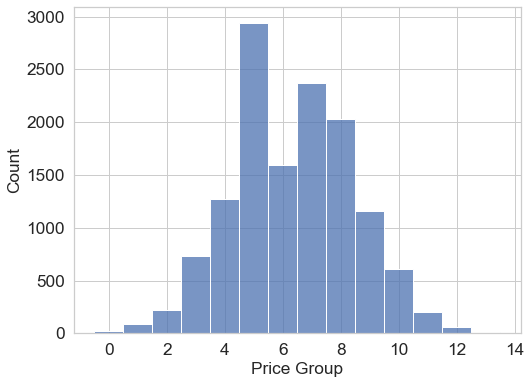

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price Group'])
plt.grid(True)

In [21]:
df.groupby(['Price Group', 'Negotiation Type']).size().unstack()

Negotiation Type  rent  sale
Price Group                 
0                   14     7
1                   53    36
2                   95   123
3                  448   281
4                  719   556
5                 1442  1501
6                  952   647
7                 1162  1206
8                 1065   965
9                  598   558
10                 332   279
11                 100   106
12                  31    30
13                   8     7

In [22]:
# Checking samples from each Price Group
df.sort_values(['Negotiation Type','Price Group']).groupby(['Price Group', 'Negotiation Type']).head(1)

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
122       500      0    50      1        2       1        1     False   
121       700      0    30      1        2       1        1     False   
10        760    160    38      2        2       1        1     False   
0         930    220    47      2        2       1        1     False   
5        1170      0    50      2        2       1        1     False   
4        1300    410    55      2        2       1        1      True   
14       1800    418    54      2        2       1        1      True   
21       2500    720    68      3        2       1        1     False   
32       3000    811   107      3        3       1        2      True   
33       6000    800   150      3        4       3        2      True   
206      8000   1400   132      3        2       1        1     False   
168     18000   1890   245      4        5       2        4      True   
1076    29000   6300   288      3        4       2        6      True   
234     45000      0   443      4        2       1        1     False   
6201    65000    110    48      2        2       1        1     False   
6199    70000      0    48      2        2       1        1     False   
5576   125000    320    32      1        2       1        1      True   
5519   179000      0    44      2        2       1        1      True   
4944   203000    190    34      2        2       1        1      True   
5054   270000    250    35      1        2       1        1     False   
4932   369000    295    63      2        2       1        1      True   
4928   530000    335    70      2        2       1        1     False   
4901   732600   1000    74      1        2       1        2      True   
4905  1200000    900    56      2        2       1        2     False   
4902  1990000   2400   164      4        5       2        3      True   
4918  2680001      0   168      2        3       2        3      True   
6279  7080000      0   275      4        5       4        5     False   
5006  8000000      0   278      4        5       3        5      True   

      Furnished  Swimming Pool    New           District Negotiation Type  \
122       False          False  False       Cidade Líder             rent   
121       False          False  False       Cidade Líder             rent   
10        False          False  False        Artur Alvim             rent   
0         False          False  False        Artur Alvim             rent   
5         False          False  False        Artur Alvim             rent   
4         False          False  False        Artur Alvim             rent   
14        False           True  False              Belém             rent   
21        False           True  False              Belém             rent   
32        False           True  False              Belém             rent   
33         True          False  False              Belém             rent   
206       False          False  False           Iguatemi             rent   
168       False           True  False  Cidade Tiradentes             rent   
1076      False           True  False         Itaim Bibi             rent   
234       False          False  False           Iguatemi             rent   
6201      False          False  False  Cidade Tiradentes             sale   
6199      False          False  False  Cidade Tiradentes             sale   
5576      False          False  False          Liberdade             sale   
5519      False          False  False               Brás             sale   
4944      False           True  False              Mooca             sale   
5054      False           True  False              Mooca             sale   
4932      False           True  False              Mooca             sale   
4928      False          False  False      Vila Madalena             sale   
4901      False           True  False      Vila Madalena             sale   
4905       True           True  False     

In [23]:
# proportional of the groups in the entire dataset
df['Price Group'].value_counts() / len(df['Price Group'])

5     0.220929
7     0.177764
8     0.152391
6     0.120036
4     0.095714
9     0.086780
3     0.054726
10    0.045867
2     0.016365
11    0.015464
1     0.006681
12    0.004579
0     0.001576
13    0.001126
Name: Price Group, dtype: float64

#### 2.6.2. Stratified Sampling

In [24]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Price Group'], random_state=27)

In [25]:
df_train.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
4229     6000   2200   165      3        2       1        2      True   
649      1500    915    86      3        2       1        1      True   
6260   400000    560    50      2        2       1        1      True   
4966   785000    550    67      2        2       1        1     False   
10344    1700    890    47      1        1       0        1     False   

       Furnished  Swimming Pool    New           District Negotiation Type  \
4229       False           True  False  Alto de Pinheiros             rent   
649         True           True  False       Vila Matilde             rent   
6260       False           True  False         Guaianazes             sale   
4966       False           True  False           Brooklin             sale   
10344      False          False  False      Santa Cecília             rent   

        Latitude  Longitude Price Group  
4229  -23.541829 -46.718899           9  
649   -23.525410 -46.525949           5  
6260  -23.493276 -46.617289           7  
4966  -23.618385 -46.684776           8  
10344   0.000000   0.000000           6

In [26]:
df_train.shape

(10656, 16)

In [27]:
# proportional of the groups in the training set
df_train['Price Group'].value_counts() / len(df_train['Price Group'])

5     0.220908
7     0.177740
8     0.152402
6     0.120026
4     0.095721
9     0.086806
3     0.054711
10    0.045890
2     0.016329
11    0.015484
1     0.006663
12    0.004598
0     0.001595
13    0.001126
Name: Price Group, dtype: float64

In [28]:
df_test.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
12888  150000    100    48      2        1       0        1     False   
5855   585000    690    70      2        2       1        1      True   
11370  299628    350    69      3        2       1        2      True   
6723   235000    350    50      2        2       1        1     False   
1887     2500    602    71      2        2       1        1      True   

       Furnished  Swimming Pool    New        District Negotiation Type  \
12888      False          False  False  José Bonifácio             sale   
5855        True           True  False        Tucuruvi             sale   
11370      False           True  False        Medeiros             sale   
6723       False          False  False     Vila Curuçá             sale   
1887       False          False  False            Lapa             rent   

        Latitude  Longitude Price Group  
12888 -23.555681 -46.431571           2  
5855  -23.468685 -46.606646           7  
11370 -23.179604 -46.996822           5  
6723  -23.507291 -46.424997           5  
1887  -23.533622 -46.704409           7

In [29]:
df_test.shape

(2665, 16)

In [30]:
# proportional of the groups in the test set
df_test['Price Group'].value_counts() / len(df_test['Price Group'])

5     0.221013
7     0.177861
8     0.152345
6     0.120075
4     0.095685
9     0.086679
3     0.054784
10    0.045779
2     0.016510
11    0.015385
1     0.006754
12    0.004503
0     0.001501
13    0.001126
Name: Price Group, dtype: float64

### 2.6.3. Saving the Datasets

In [31]:
# removing the attribute "Price Group"
df_train = df_train.drop(columns=['Price Group'])
df_test = df_test.drop(columns=['Price Group'])

In [32]:
df_train.to_csv('./datasets/sao-paulo-properties_train.csv', index=False)
df_test.to_csv('./datasets/sao-paulo-properties_test.csv', index=False)

## 🧹 3. Data Cleaning

In [33]:
df_train_clean = df_train.copy()

In [34]:
df_train_clean.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
4229     6000   2200   165      3        2       1        2      True   
649      1500    915    86      3        2       1        1      True   
6260   400000    560    50      2        2       1        1      True   
4966   785000    550    67      2        2       1        1     False   
10344    1700    890    47      1        1       0        1     False   

       Furnished  Swimming Pool    New           District Negotiation Type  \
4229       False           True  False  Alto de Pinheiros             rent   
649         True           True  False       Vila Matilde             rent   
6260       False           True  False         Guaianazes             sale   
4966       False           True  False           Brooklin             sale   
10344      False          False  False      Santa Cecília             rent   

        Latitude  Longitude  
4229  -23.541829 -46.718899  
649   -23.525410 -46.525949  
6260  -23.493276 -46.617289  
4966  -23.618385 -46.684776  
10344   0.000000   0.000000

### 3.1. Missing values

As we checked in the dataset description, the `Condo` value is filled with zero when it is unknown.

Also, there are wrong `Latitude` and `Longitude` values.

In [35]:
# Checking how many samples with errors we have
df_train_clean.query('(Condo == 0) or (Latitude == 0) or (Latitude > -23.36) or (Latitude < -24.00) or (Longitude == 0) or (Longitude > -46.36) or (Longitude < -46.84)')

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
10344    1700    890    47      1        1       0        1     False   
1859     1500      0    65      2        2       1        1      True   
8766   830000   1251    48      1        2       1        1      True   
6435   198500      0    50      2        2       1        1      True   
3608     2500    536    40      1        1       0        1     False   
...       ...    ...   ...    ...      ...     ...      ...       ...   
9663     8000      0    62      1        2       1        2     False   
4719     6000   1588   138      3        2       1        1     False   
6799   275000      0    51      2        2       1        1     False   
10475    2150      0    75      3        2       1        2      True   
300       900      0    44      2        2       1        1     False   

       Furnished  Swimming Pool    New        District Negotiation Type  \
10344      False          False  False   Santa Cecília             rent   
1859       False          False  False            Lapa             rent   
8766       False           True  False      Itaim Bibi             sale   
6435       False           True  False         Lajeado             sale   
3608        True          False  False      Itaim Bibi             rent   
...          ...            ...    ...             ...              ...   
9663       False          False  False        Iguatemi             rent   
4719       False          False  False       Pinheiros             rent   
6799       False          False  False    Vila Matilde             sale   
10475      False           True  False    Vila Matilde             rent   
300        False          False  False  José Bonifácio             rent   

        Latitude  Longitude  
10344   0.000000   0.000000  
1859  -23.522944 -46.699231  
8766    0.000000   0.000000  
6435  -23.534887 -46.403105  
3608    0.000000   0.000000  
...          ...        ...  
9663  -23.583830 -46.683541  
4719    0.000000   0.000000  
6799  -23.533037 -46.529253  
10475 -23.537197 -46.534562  
300   -23.551798 -46.444855  

[2186 rows x 15 columns]

About 16% of our dataset contains wrong or missing information. **We must fix them!**

A good estimative for these attributes would be the ***median*** values of other samples in the same `District`.

In [36]:
# Checking the median Condo by District
df_train_clean.groupby('District')[['Condo', 'Latitude', 'Longitude']].median().head()

Condo   Latitude  Longitude
District                                       
Alto de Pinheiros  1200.0 -23.542629 -46.715501
Anhanguera          650.0 -23.660743 -46.686148
Aricanduva          330.0 -23.538514 -46.518194
Artur Alvim         140.0 -23.538515 -46.480723
Barra Funda         520.0 -23.524613 -46.658090

Let's create an inputer for solving this.

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class GroupMissingOrOutOfRangeImputer(BaseEstimator, TransformerMixin):
    def __init__(self, group_cols, target, missing_val, upper_bound=np.inf, lower_bound=-np.inf, metric='mean'):
        assert metric in ['mean', 'median'], 'Unrecognized value for metric, should be mean/median'
        assert type(group_cols) == list, 'group_cols should be a list of columns'
        assert type(missing_val) == int or type(missing_val) == float, 'missing_val should be a number'
        assert type(upper_bound) == int or type(upper_bound) == float, 'upper_bound should be a number'
        assert type(lower_bound) == int or type(lower_bound) == float, 'lower_bound should be a number'
        assert type(target) == str, 'target should be a string'
        
        super().__init__()
        
        self.group_cols = group_cols
        self.target = target
        self.missing_val = missing_val
        self.upper_bound = upper_bound
        self.lower_bound = lower_bound
        self.metric = metric
    
    def fit(self, X, y=None):
        
        assert pd.isnull(X.loc[:, self.group_cols]).any(axis=None) == False, 'There are missing values in group_cols'
        
        impute_map = X.groupby(self.group_cols)[self.target].agg(self.metric).reset_index(drop=False)
        
        self.impute_map_ = impute_map
        
        return self 
    
    def transform(self, X, y=None):
        
        # make sure that the imputer was fitted
        check_is_fitted(self, 'impute_map_')
        
        X = X.copy()
        
        for index, row in self.impute_map_.iterrows():
            ind = (X[self.group_cols] == row[self.group_cols]).all(axis=1)
            attribute = X.loc[ind, self.target]
            mask = ((attribute == self.missing_val) | (attribute > self.upper_bound) | (attribute < self.lower_bound))
            X.loc[ind, self.target] = X.loc[ind, self.target].mask(mask, row[self.target])
        
        return X

In [38]:
condo_imputer = GroupMissingOrOutOfRangeImputer(group_cols=['District'], 
                   target='Condo',
                   missing_val=0,                   
                   metric='median')

latitude_imputer = GroupMissingOrOutOfRangeImputer(group_cols=['District'], 
                   target='Latitude',
                   missing_val=0,
                   upper_bound=-23.36,
                   lower_bound=-24.00,
                   metric='median')

longitude_imputer = GroupMissingOrOutOfRangeImputer(group_cols=['District'], 
                   target='Longitude',
                   missing_val=0,
                   upper_bound=-46.36,
                   lower_bound=-46.84,
                   metric='median')

df_train_clean = condo_imputer.fit_transform(df_train_clean)
df_train_clean = latitude_imputer.fit_transform(df_train_clean)
df_train_clean = longitude_imputer.fit_transform(df_train_clean)

df_train_clean.head()

Price   Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  \
4229     6000  2200.0   165      3        2       1        2      True   
649      1500   915.0    86      3        2       1        1      True   
6260   400000   560.0    50      2        2       1        1      True   
4966   785000   550.0    67      2        2       1        1     False   
10344    1700   890.0    47      1        1       0        1     False   

       Furnished  Swimming Pool    New           District Negotiation Type  \
4229       False           True  False  Alto de Pinheiros             rent   
649         True           True  False       Vila Matilde             rent   
6260       False           True  False         Guaianazes             sale   
4966       False           True  False           Brooklin             sale   
10344      False          False  False      Santa Cecília             rent   

        Latitude  Longitude  
4229  -23.541829 -46.718899  
649   -23.525410 -46.525949  
6260  -23.493276 -46.617289  
4966  -23.618385 -46.684776  
10344 -23.537152 -46.654839

In [39]:
# Checking how many samples with errors we have
df_train_clean.query('(Condo == 0) or (Latitude == 0) or (Latitude > -23.36) or (Latitude < -24.00) or (Longitude == 0) or (Longitude > -46.36) or (Longitude < -46.84)')

Empty DataFrame
Columns: [Price, Condo, Size, Rooms, Toilets, Suites, Parking, Elevator, Furnished, Swimming Pool, New, District, Negotiation Type, Latitude, Longitude]
Index: []

### 3.2. Saving the Dataset

In [40]:
df_train_clean.to_csv('./datasets/sao-paulo-properties_train_clean.csv', index=False)

## 📊 4. Explore the Data
We next perform a _simple exploratory data analysis (EDA)_ to gain insights about the data. <br/>
A more complete EDA with hypotheses about the problem should be further elaborated. 

Since the `Price` attribute is very different depending on the `Negotiation Type`, let's visualize them separately.

In [41]:
mask_sale = df_train_clean['Negotiation Type'].eq('sale')
mask_rent = df_train_clean['Negotiation Type'].eq('rent')

### 4.1. Visualizing Geographical Data

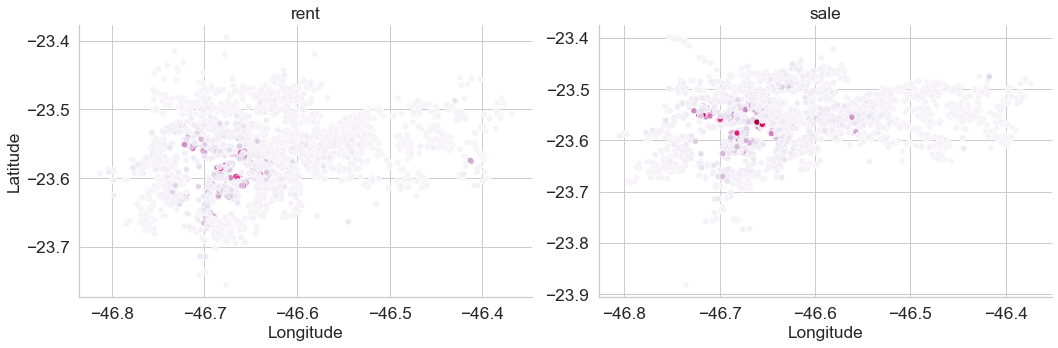

In [42]:
grid = sns.FacetGrid(df_train_clean, col='Negotiation Type', sharex=False, sharey=False, height=5, aspect=1.5)
plot = grid.map_dataframe(sns.scatterplot, x="Longitude", y="Latitude", hue="Price", palette="PuRd")
plot.set_titles("{col_name}")
display()

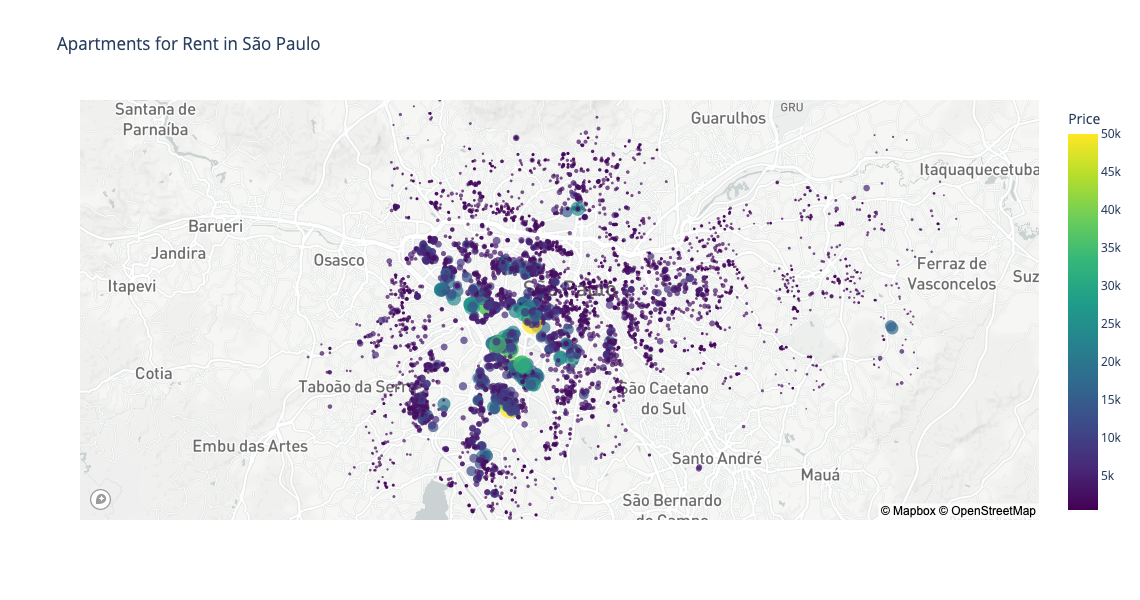

In [43]:
import plotly.express as px

px.set_mapbox_access_token('pk.eyJ1IjoiY2llbmNpYWRlZGFkb3NpZnNwY2FtcGluYXMiLCJhIjoiY2tzcW9sNTRhMGR2bzJ1cGcxNTI1bWppdiJ9.4TJwkUhuLIt-2nH0YudsMg')
fig = px.scatter_mapbox(df_train_clean[mask_rent], lat="Latitude", lon="Longitude", color="Price", size="Price", 
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=10, width=1000, height=600, 
                        title='Apartments for Rent in São Paulo')
fig.show()

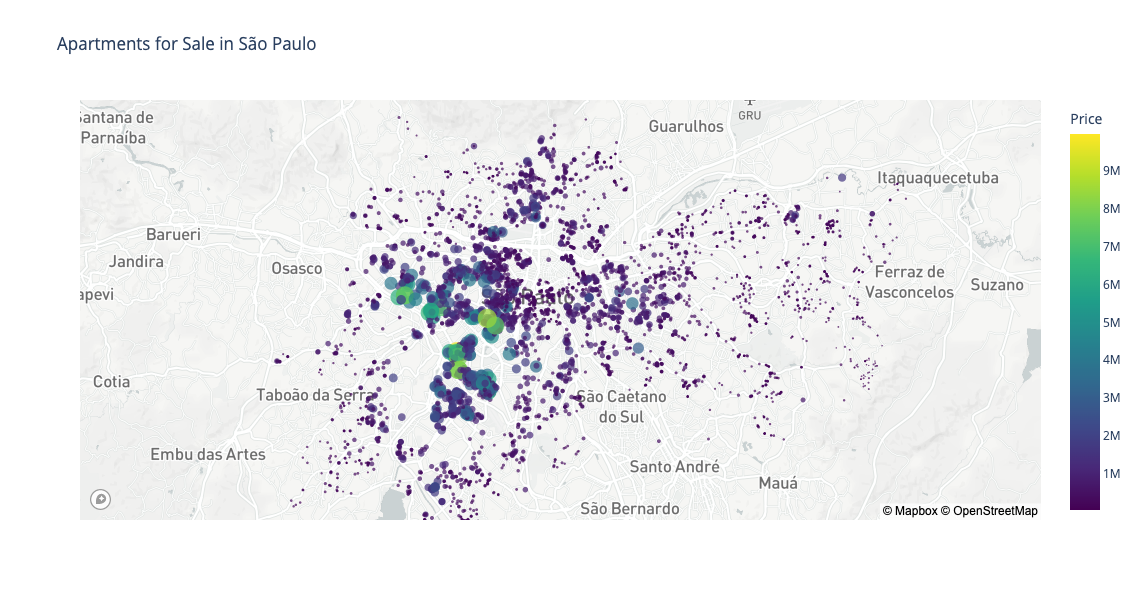

In [44]:
fig = px.scatter_mapbox(df_train_clean[mask_sale], lat="Latitude", lon="Longitude", color="Price", size="Price", 
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=10, width=1000, height=600, 
                        title='Apartments for Sale in São Paulo')
fig.show()

Some interesting findings:

- The most expensive apartments are in the West and South Central regions of the city (as expected).
- There are almost no observations in the extreme south of São Paulo.

### 4.2. Looking for Correlations

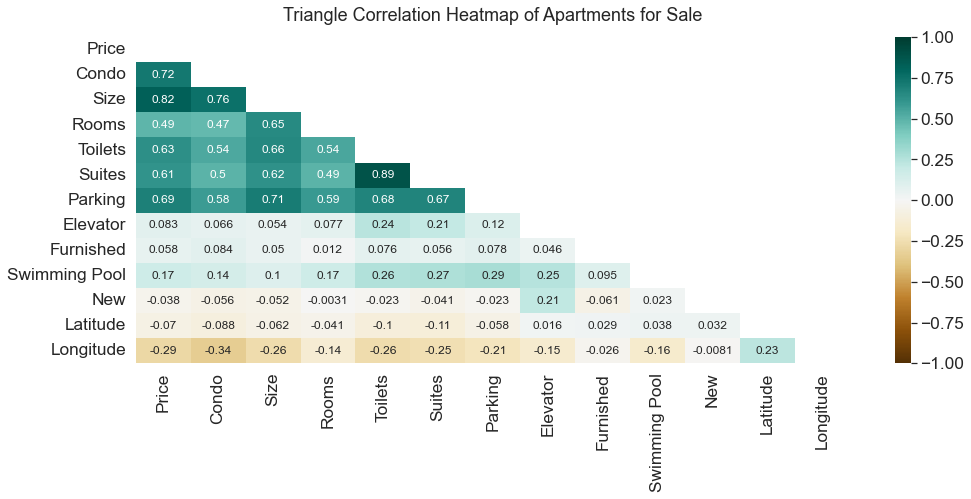

In [45]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_train_clean[mask_sale].corr(), dtype='bool'))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(df_train_clean[mask_sale].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap of Apartments for Sale', fontdict={'fontsize':18}, pad=16);

In [46]:
df_train_clean[mask_sale].corr()["Price"].sort_values(ascending=False)

Price            1.000000
Size             0.824281
Condo            0.723691
Parking          0.688795
Toilets          0.626799
Suites           0.610914
Rooms            0.486552
Swimming Pool    0.168757
Elevator         0.082714
Furnished        0.058318
New             -0.038169
Latitude        -0.070117
Longitude       -0.287902
Name: Price, dtype: float64

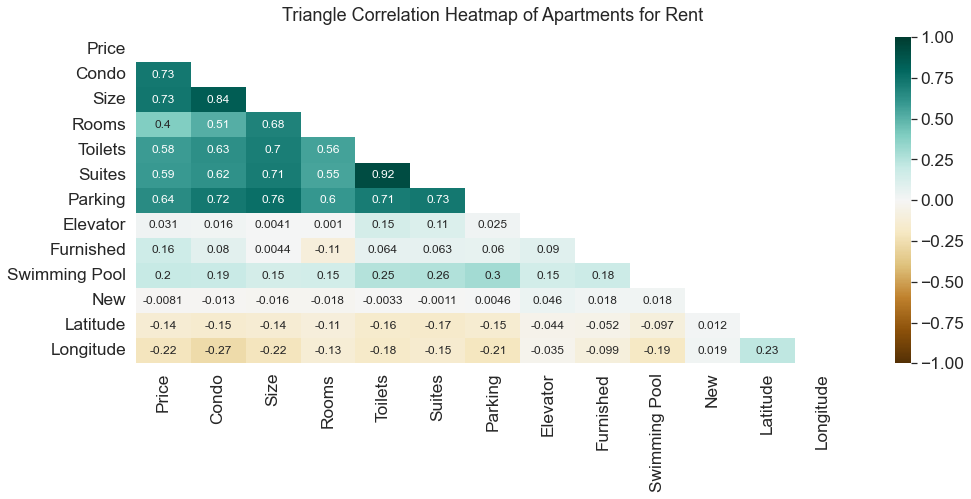

In [47]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_train_clean[mask_rent].corr(), dtype='bool'))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(df_train_clean[mask_rent].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap of Apartments for Rent', fontdict={'fontsize':18}, pad=16);

In [48]:
df_train_clean[mask_rent].corr()["Price"].sort_values(ascending=False)

Price            1.000000
Size             0.731041
Condo            0.726497
Parking          0.644991
Suites           0.586416
Toilets          0.582120
Rooms            0.396952
Swimming Pool    0.202191
Furnished        0.164984
Elevator         0.030796
New             -0.008140
Latitude        -0.139451
Longitude       -0.215688
Name: Price, dtype: float64

The _most promising attribute_ to predict the `Price` is the **`Size`**, in both apartments for sale and rent, so let’s zoom in on their correlation scatterplot:

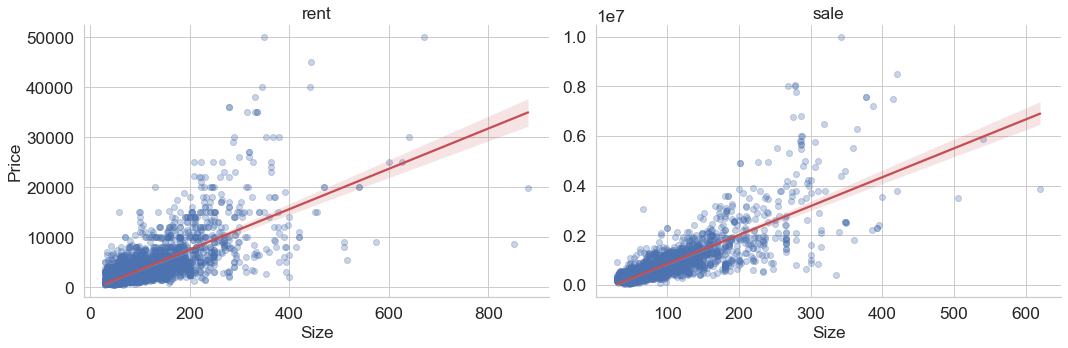

In [49]:
grid = sns.FacetGrid(df_train_clean, col='Negotiation Type', sharex=False, sharey=False, height=5, aspect=1.5)
plot = grid.map_dataframe(sns.regplot, x='Size', y="Price", scatter_kws={'alpha': 0.3}, line_kws={'color': 'r'})
plot.set_titles("{col_name}")
display()

Here we can see that the _correlation_ is **strong**: see the regression line and the _upward trend_.

#### Let's now check the correlation between the `Price` and the `District`s

In [50]:
dummy_districts = pd.get_dummies(df_train_clean[['Price', 'District']])

print("Apartments for Rent\n")
print(dummy_districts[mask_rent].corr()["Price"].sort_values(ascending=False))

print("\nApartments for Sale\n")
print(dummy_districts[mask_sale].corr()["Price"].sort_values(ascending=False))

Apartments for Rent

Price                          1.000000
District_Itaim Bibi            0.218699
District_Moema                 0.208866
District_Jardim Paulista       0.178626
District_Alto de Pinheiros     0.165119
District_Campo Belo            0.151522
District_Iguatemi              0.113209
District_Pinheiros             0.112462
District_Brooklin              0.102410
District_Vila Mariana          0.081130
District_Vila Leopoldina       0.064885
District_Vila Olimpia          0.056361
District_Perdizes              0.051959
District_Santo Amaro           0.044130
District_Vila Madalena         0.036362
District_Santa Cecília         0.035908
District_Consolação            0.027830
District_Morumbi               0.019684
District_Bela Vista            0.014894
District_Cidade Dutra          0.006000
District_Barra Funda           0.000289
District_Ipiranga             -0.000225
District_Vila Andrade         -0.000437
District_Medeiros             -0.003449
District_Lapa      

As we have seen in the geographycal observations, the `Districts` have influence on the `Price`.

We should keep these informations available to our model.

### 4.3. Data distribution

In [51]:
numeric_attributes = df_train_clean.select_dtypes(include='number').columns
numeric_attributes

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Latitude', 'Longitude'],
      dtype='object')

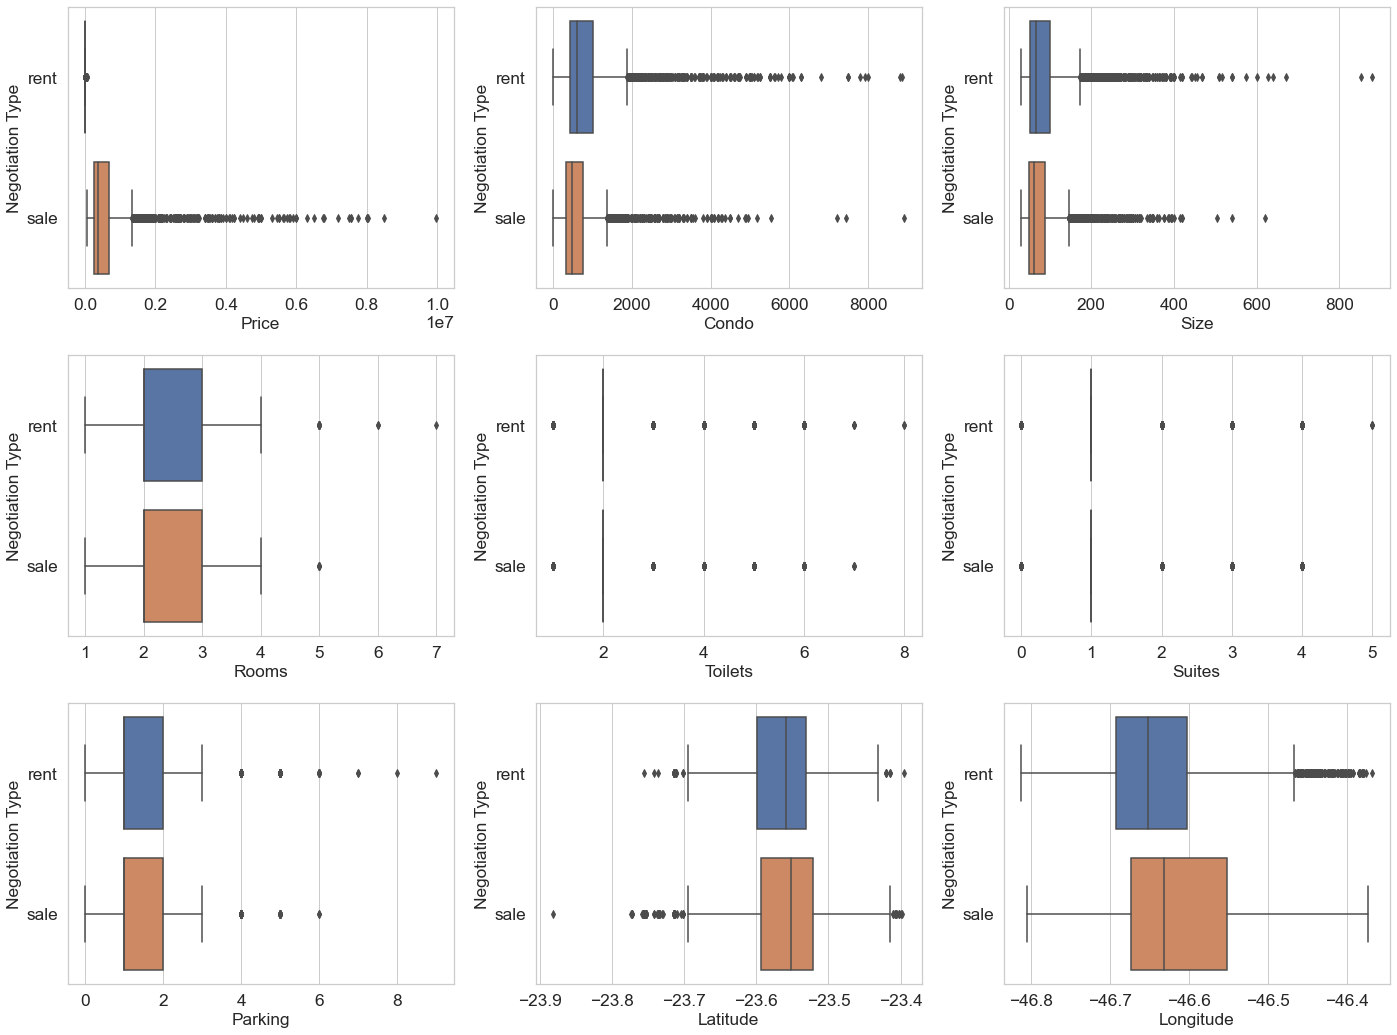

In [52]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.tight_layout(pad=3.0)

for i, attr in enumerate(numeric_attributes):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df_train_clean, x=attr, y="Negotiation Type", ax=axes[row, col])

We can see that all the attributes have many _outliers_. However, we **will not** remove them because _they do not seem to be noise_.

As we've seen before, the dataset is not well-balanced, so the majority of the samples have _"low"_ `Prices`, `Condo`, `Size`, `Rooms`, `Toilets`, `Suites`, and `Parking` attributes.

## 🛠️ 5. Prepare the Data (Preprocessing)

In [53]:
# load the cleaned training set
df_train = pd.read_csv('./datasets/sao-paulo-properties_train_clean.csv')

# reassign the masks
mask_sale = df_train['Negotiation Type'].eq('sale')
mask_rent = df_train['Negotiation Type'].eq('rent')

### 5.1. Adding new features

Before we prepare our model, let's try to explore some new features, based on what we've learned for far.

A great strategy is trying to create new features from the most promising ones that we found before.

- `Size`
- `Condo`
- `Parking`
- `Toilets`
- `Suites`
- `Rooms`
- `District`

#### Adding the District Zones

Since we have too many districts in the city of São Paulo, we can group them by the administrative regions where they are located.

[Reference: Territorial and Administrative Division of the City of São Paulo](https://pt.wikipedia.org/wiki/Divis%C3%A3o_territorial_e_administrativa_do_munic%C3%ADpio_de_S%C3%A3o_Paulo)

Let's create a transformer for this purpose:

In [54]:
class DistrictZonesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
        pass
    
    def fit(self, X, y=None):
        
        zones = {"Center": ["Bela Vista", "Bom Retiro", "Cambuci", "Consolação", "Liberdade", "República", "Sé", "Santa Cecília"],
         "Center-South": ["Santo Amaro", "Campo Grande", "Campo Belo", "Vila Mariana", "Saúde", "Moema", "Jabaquara", "Brooklin", "Vila Olimpia"],
         "Northeast": [ "Cachoeirinha",  "Santana","Casa Verde", "Jaçanã","Limão", "Mandaqui", "Tremembé", "Tucuruvi","Vila Guilherme", "Vila Maria", "Medeiros"],
         "Northwest": [ "Anhanguera", "Perus", "Jaraguá", "São Domingos", "Pirituba", "Freguesia do Ó","Brasilândia"],
         "South": [ "Grajaú", "Campo Limpo", "Capão Redondo", "Cidade Ademar", "Cidade Dutra", "Jardim Ângela", "Jardim São Luis", "Marsilac", "Parelheiros", "Pedreira", "Socorro", "Vila Andrade"],
         "West": ["Itaim Bibi", "Lapa", "Morumbi", "Pinheiros", "Alto de Pinheiros", "Barra Funda", "Butantã", "Jaguaré", "Jardim Paulista", "Perdizes", "Raposo Tavares", "Rio Pequeno", "Vila Leopoldina", "Vila Madalena", "Vila Sônia"],
         "East-1": ["Penha", "Ermelino Matarazzo", "Itaquera", "São Mateus", "Artur Alvim", "Cangaíba",  "Cidade Líder", "Iguatemi", "José Bonifácio", "Parque do Carmo", "Ponte Rasa", "São Rafael", "Vila Matilde"],
         "East-2": [ "Itaim Paulista",  "Guaianazes", "São Miguel", "Cidade Tiradentes", "Jardim Helena",  "Vila Jacuí", "Vila Curuçá", "Lajeado"],
         "Southeast": ["Mooca", "Aricanduva", "Sapopemba",  "Vila Prudente", "Ipiranga",  "Tatuapé",  "Água Rasa",  "Vila Formosa", "Pari", "Brás", "Belém", "São Lucas", "Cursino", "Sacomã", "Carrão"]
        }
        self.zonesMap = {v: k for k,vv in zones.items() for v in vv}
        
        return self  # nothing else to do
    
    def transform(self, X):
        X = X.copy()
        
        # creating the new features
        X['District Zone'] = X['District'].map(self.zonesMap)
        
        return X

In [55]:
df_train = DistrictZonesTransformer().fit_transform(df_train)
df_train.head()

Price   Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0    6000  2200.0   165      3        2       1        2      True      False   
1    1500   915.0    86      3        2       1        1      True       True   
2  400000   560.0    50      2        2       1        1      True      False   
3  785000   550.0    67      2        2       1        1     False      False   
4    1700   890.0    47      1        1       0        1     False      False   

   Swimming Pool    New           District Negotiation Type   Latitude  \
0           True  False  Alto de Pinheiros             rent -23.541829   
1           True  False       Vila Matilde             rent -23.525410   
2           True  False         Guaianazes             sale -23.493276   
3           True  False           Brooklin             sale -23.618385   
4          False  False      Santa Cecília             rent -23.537152   

   Longitude District Zone  
0 -46.718899          West  
1 -46.525949        East-1  
2 -46.617289        East-2  
3 -46.684776  Center-South  
4 -46.654839        Center

#### Adding some other derivated attributes

Let's perform some operations to derive new attributes compared to the `Size` and the `Rooms`.

In [56]:
class ApartmentsNumericalFeatEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
        pass
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        X = X.copy()
        
        # creating the new features
        X['Parkings per Room'] = X['Parking'] / X['Rooms']
        X['Condo per Room'] = X['Condo'] / X['Rooms']
        X['Suites per Room'] = X['Suites'] / X['Rooms']
        X['Toilets per Room'] = X['Toilets'] / X['Rooms']
        X['Size per Room'] = X['Size'] / X['Rooms']
        X['Parkings per Size'] = X['Parking'] / X['Size']
        X['Condo per Size'] = X['Condo'] / X['Size']
        X['Suites per Size'] = X['Suites'] / X['Size']
        X['Toilets per Size'] = X['Toilets'] / X['Size']
        X['Rooms per Size'] = X['Rooms'] / X['Size']
        
        return X

In [57]:
df_train = ApartmentsNumericalFeatEngineering().fit_transform(df_train)
df_train.head()

Price   Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0    6000  2200.0   165      3        2       1        2      True      False   
1    1500   915.0    86      3        2       1        1      True       True   
2  400000   560.0    50      2        2       1        1      True      False   
3  785000   550.0    67      2        2       1        1     False      False   
4    1700   890.0    47      1        1       0        1     False      False   

   Swimming Pool  ...  Parkings per Room Condo per Room Suites per Room  \
0           True  ...           0.666667     733.333333        0.333333   
1           True  ...           0.333333     305.000000        0.333333   
2           True  ...           0.500000     280.000000        0.500000   
3           True  ...           0.500000     275.000000        0.500000   
4          False  ...           1.000000     890.000000        0.000000   

   Toilets per Room  Size per Room Parkings per Size  Condo per Size  \
0          0.666667      55.000000          0.012121       13.333333   
1          0.666667      28.666667          0.011628       10.639535   
2          1.000000      25.000000          0.020000       11.200000   
3          1.000000      33.500000          0.014925        8.208955   
4          1.000000      47.000000          0.021277       18.936170   

   Suites per Size  Toilets per Size  Rooms per Size  
0         0.006061          0.012121        0.018182  
1         0.011628          0.023256        0.034884  
2         0.020000          0.040000        0.040000  
3         0.014925          0.029851        0.029851  
4         0.000000          0.021277        0.021277  

[5 rows x 26 columns]

### 5.2. Quick EDA to get insights about the new features 

#### Checking the District Zones

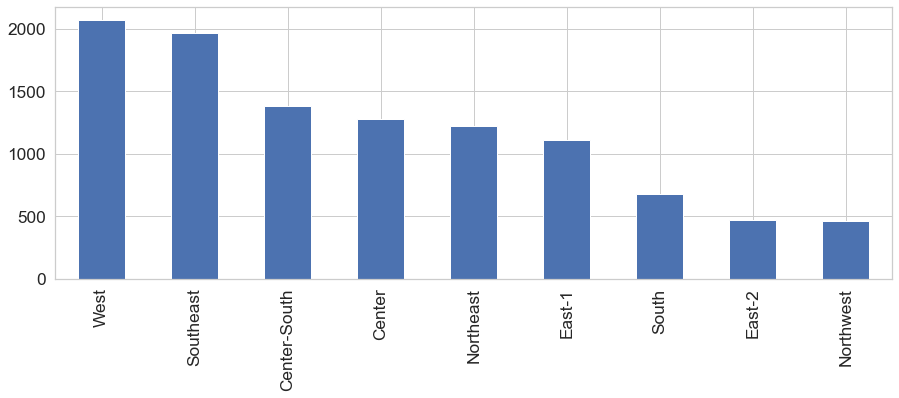

In [58]:
# Distribution of samples by District Zone
df_train['District Zone'].value_counts().plot.bar()
display()

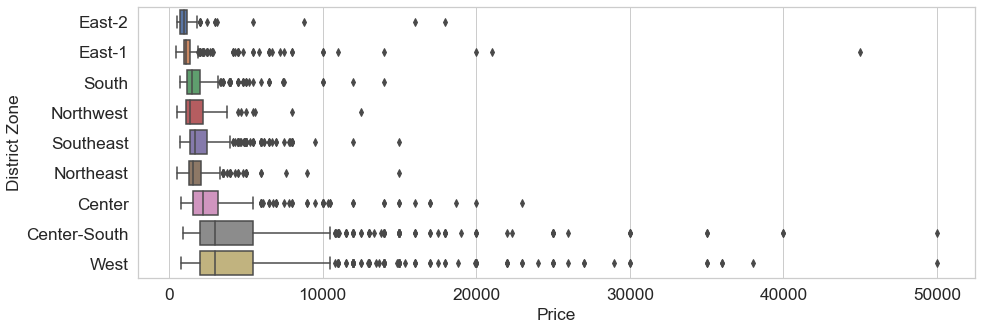

In [59]:
# Rent Price per Distric Zone
order = ['East-2', 'East-1', 'South', 'Northwest', 'Southeast', 'Northeast', 'Center', 'Center-South', 'West']
sns.boxplot(data=df_train[mask_rent], x="Price", y="District Zone", order=order)
display()

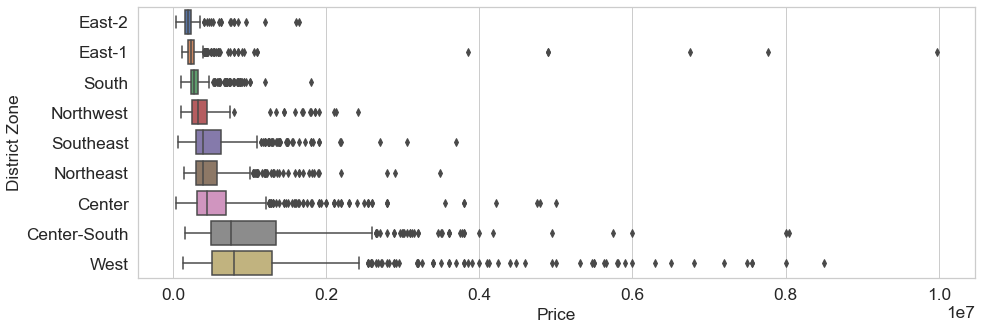

In [60]:
# Sales Price per Distric Zone
sns.boxplot(data=df_train[mask_sale], x="Price", y="District Zone", order=order)
display()

In [61]:
# Checking the correlation between the District Zones and the Price
dummy_district_zones = pd.get_dummies(df_train[['Price', 'District Zone']])

print("Apartments for Rent\n")
print(dummy_district_zones[mask_rent].corr()["Price"].sort_values(ascending=False))

print("\nApartments for Sale\n")
print(dummy_district_zones[mask_sale].corr()["Price"].sort_values(ascending=False))

Apartments for Rent

Price                         1.000000
District Zone_West            0.231487
District Zone_Center-South    0.203450
District Zone_Center         -0.019289
District Zone_South          -0.070812
District Zone_East-2         -0.082361
District Zone_Northwest      -0.086799
District Zone_Northeast      -0.120068
District Zone_East-1         -0.120632
District Zone_Southeast      -0.128800
Name: Price, dtype: float64

Apartments for Sale

Price                         1.000000
District Zone_West            0.302897
District Zone_Center-South    0.223058
District Zone_Center          0.001113
District Zone_Northwest      -0.041295
District Zone_Northeast      -0.060490
District Zone_Southeast      -0.070561
District Zone_South          -0.106753
District Zone_East-2         -0.139892
District Zone_East-1         -0.160825
Name: Price, dtype: float64


#### Checking the new numerical attributes

In [62]:
df_train.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District',
       'Negotiation Type', 'Latitude', 'Longitude', 'District Zone',
       'Parkings per Room', 'Condo per Room', 'Suites per Room',
       'Toilets per Room', 'Size per Room', 'Parkings per Size',
       'Condo per Size', 'Suites per Size', 'Toilets per Size',
       'Rooms per Size'],
      dtype='object')

In [63]:
new_numerical_attributes = ['Parkings per Room', 'Condo per Room', 'Suites per Room', 'Toilets per Room', 'Size per Room', 
                            'Parkings per Size', 'Condo per Size', 'Suites per Size', 'Toilets per Size', 'Rooms per Size']

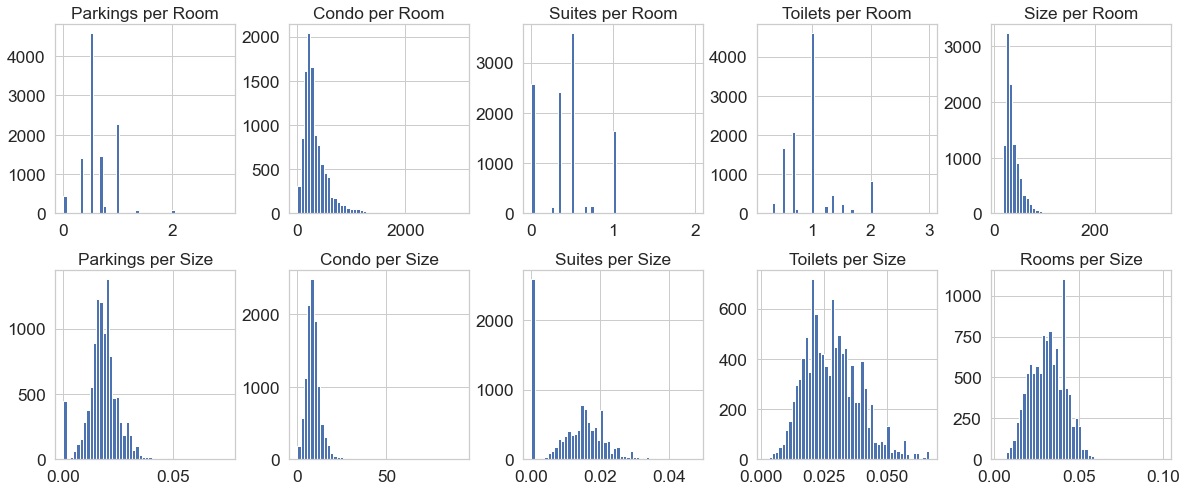

In [64]:
# plot a histogram for each new numerical attribute
fig, ax = plt.subplots(2,5, figsize=(20,8))
df_train[new_numerical_attributes].hist(bins=50, ax=ax)
display()

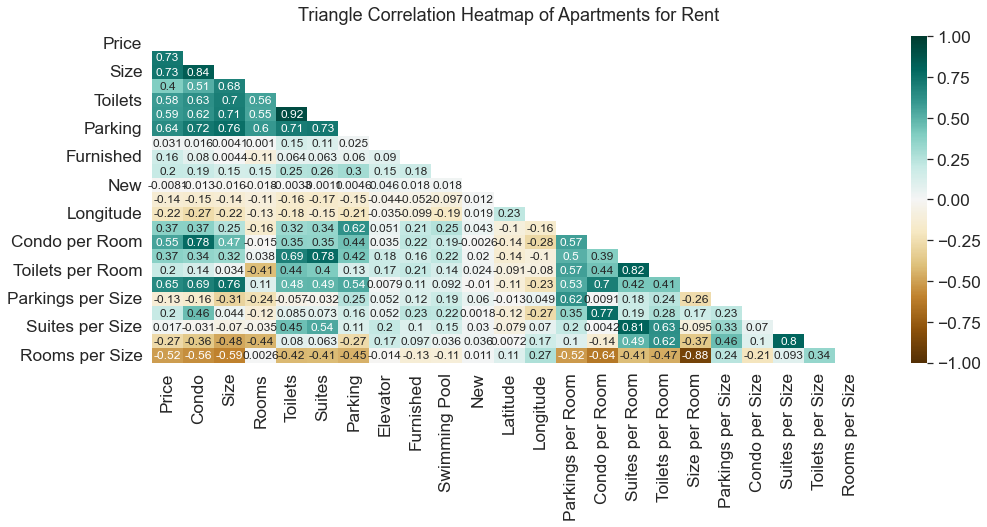

In [65]:
# plotting the correlation coeficients as a heatmap for rent
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_train[mask_rent].corr(), dtype='bool'))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(df_train[mask_rent].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap of Apartments for Rent', fontdict={'fontsize':18}, pad=16);

In [66]:
df_train[mask_rent].corr()["Price"].sort_values(ascending=False)

Price                1.000000
Size                 0.731041
Condo                0.726497
Size per Room        0.651049
Parking              0.644991
Suites               0.586416
Toilets              0.582120
Condo per Room       0.552697
Rooms                0.396952
Parkings per Room    0.370921
Suites per Room      0.370075
Swimming Pool        0.202191
Condo per Size       0.196895
Toilets per Room     0.196192
Furnished            0.164984
Elevator             0.030796
Suites per Size      0.016891
New                 -0.008140
Parkings per Size   -0.125795
Latitude            -0.139451
Longitude           -0.215688
Toilets per Size    -0.274545
Rooms per Size      -0.515146
Name: Price, dtype: float64

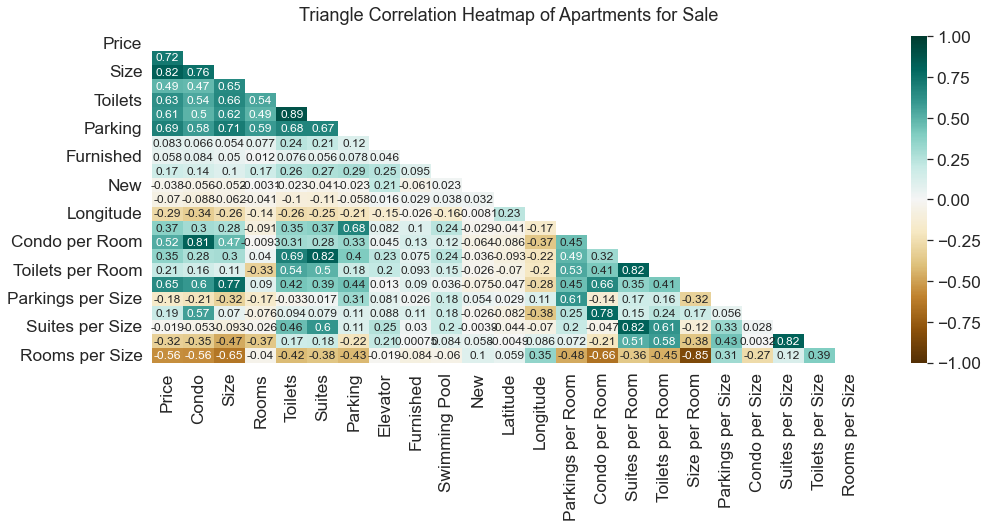

In [67]:
# plotting the correlation coeficients as a heatmap for sale
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_train[mask_sale].corr(), dtype='bool'))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(df_train[mask_sale].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap of Apartments for Sale', fontdict={'fontsize':18}, pad=16);

In [68]:
df_train[mask_sale].corr()["Price"].sort_values(ascending=False)

Price                1.000000
Size                 0.824281
Condo                0.723691
Parking              0.688795
Size per Room        0.645978
Toilets              0.626799
Suites               0.610914
Condo per Room       0.522648
Rooms                0.486552
Parkings per Room    0.368641
Suites per Room      0.351718
Toilets per Room     0.206438
Condo per Size       0.194886
Swimming Pool        0.168757
Elevator             0.082714
Furnished            0.058318
Suites per Size     -0.018866
New                 -0.038169
Latitude            -0.070117
Parkings per Size   -0.179306
Longitude           -0.287902
Toilets per Size    -0.323572
Rooms per Size      -0.559423
Name: Price, dtype: float64

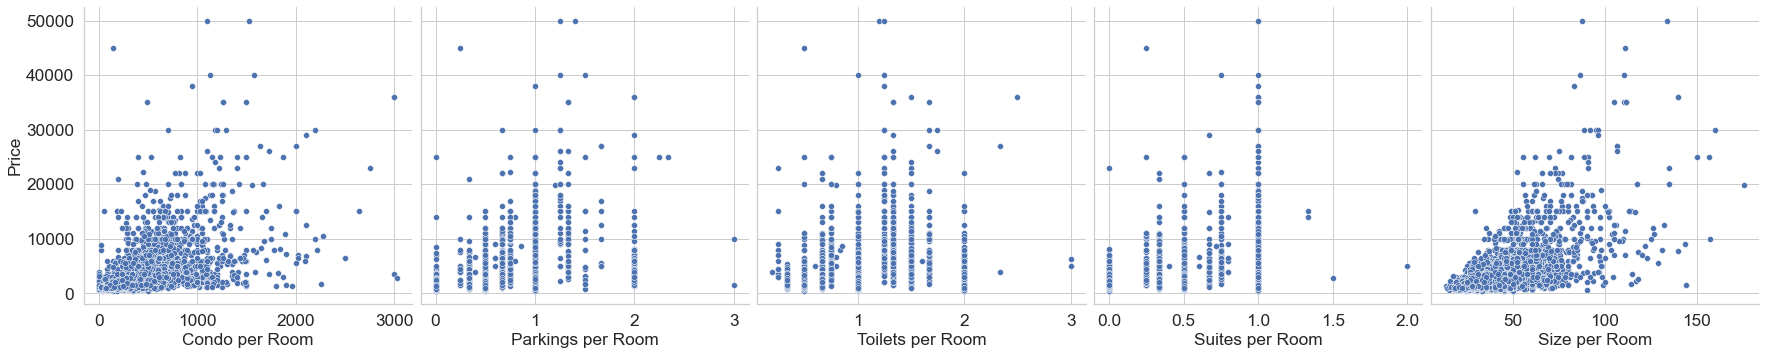

In [69]:
# Rent features derived by Rooms
sns.pairplot(df_train[mask_rent], x_vars=['Condo per Room', 'Parkings per Room', 'Toilets per Room', 'Suites per Room', 'Size per Room'],  y_vars=['Price'], height=5)
display()

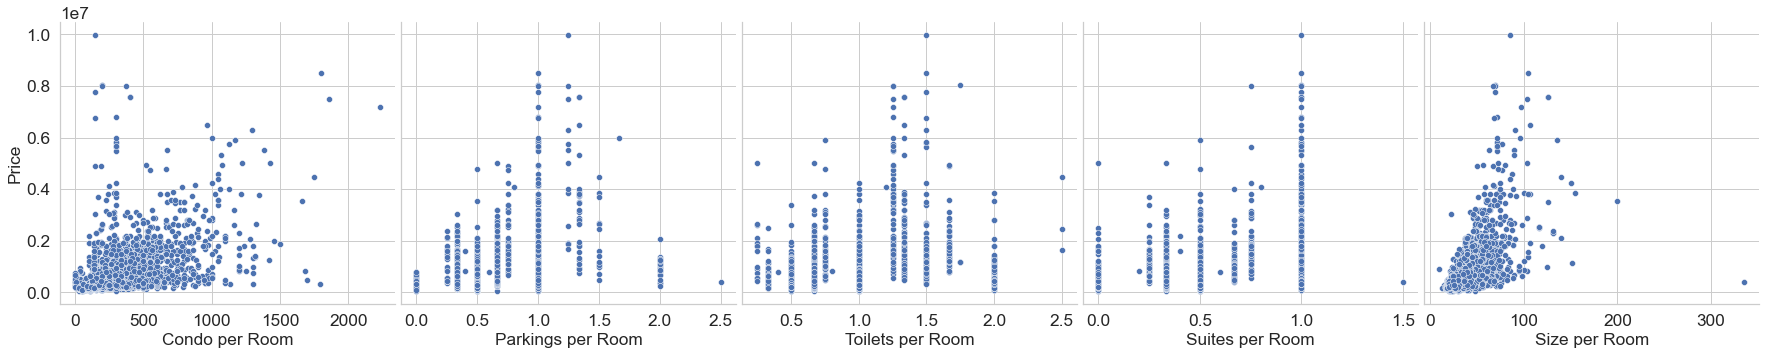

In [70]:
# Sale features derived by Rooms
sns.pairplot(df_train[mask_sale], x_vars=['Condo per Room', 'Parkings per Room', 'Toilets per Room', 'Suites per Room', 'Size per Room'],  y_vars=['Price'], height=5)
display()

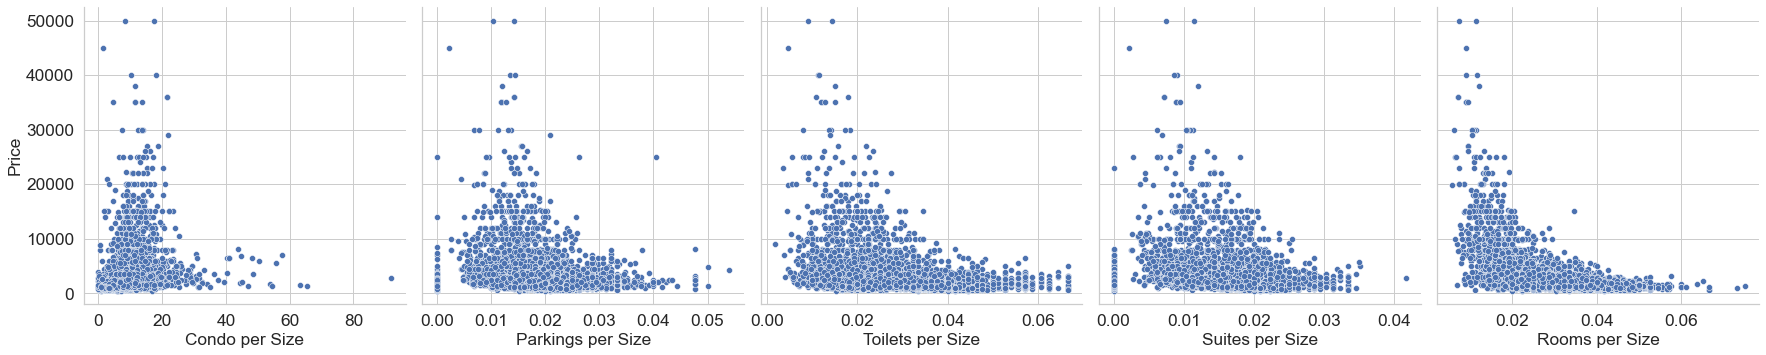

In [71]:
# Rent features derived by Size
sns.pairplot(df_train[mask_rent], x_vars=['Condo per Size', 'Parkings per Size', 'Toilets per Size',  'Suites per Size', 'Rooms per Size'],  y_vars=['Price'], height=5)
display()

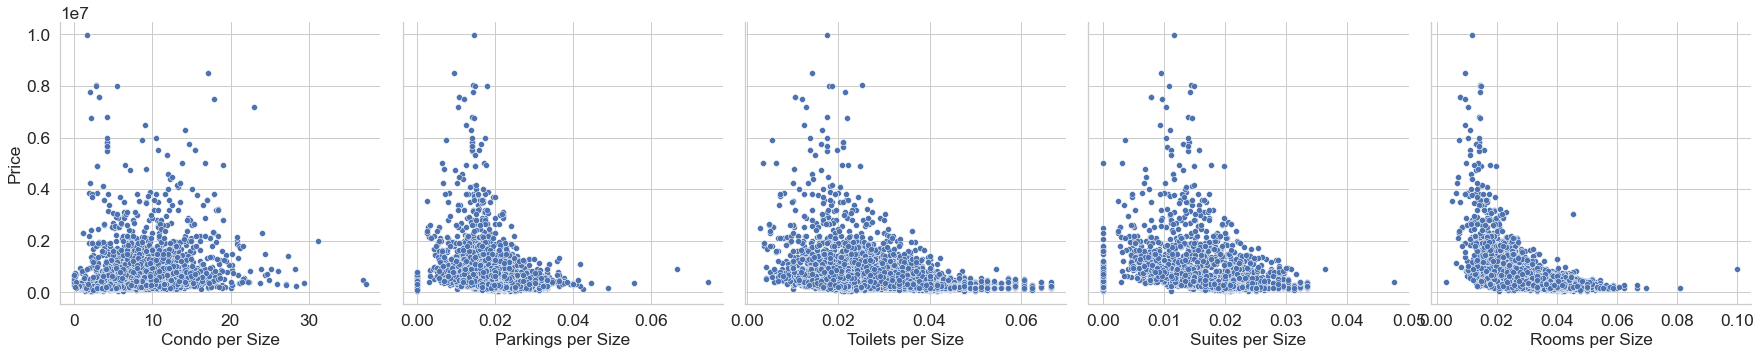

In [72]:
# Sale features derived by Size
sns.pairplot(df_train[mask_sale], x_vars=['Condo per Size', 'Parkings per Size', 'Toilets per Size',  'Suites per Size', 'Rooms per Size'],  y_vars=['Price'], height=5)
display()

#### Comparing the correlation between all the variables and the Price

In [73]:
dummy_df_train = pd.get_dummies(df_train)

print("Apartments for Rent\n")
print(dummy_df_train[mask_rent].corr()["Price"].sort_values(ascending=False))

Apartments for Rent

Price                          1.000000
Size                           0.731041
Condo                          0.726497
Size per Room                  0.651049
Parking                        0.644991
Suites                         0.586416
Toilets                        0.582120
Condo per Room                 0.552697
Rooms                          0.396952
Parkings per Room              0.370921
Suites per Room                0.370075
District Zone_West             0.231487
District_Itaim Bibi            0.218699
District_Moema                 0.208866
District Zone_Center-South     0.203450
Swimming Pool                  0.202191
Condo per Size                 0.196895
Toilets per Room               0.196192
District_Jardim Paulista       0.178626
District_Alto de Pinheiros     0.165119
Furnished                      0.164984
District_Campo Belo            0.151522
District_Iguatemi              0.113209
District_Pinheiros             0.112462
District_Brooklin  

In [74]:
print("Apartments for Sale\n")
print(dummy_df_train[mask_sale].corr()["Price"].sort_values(ascending=False))

Apartments for Sale

Price                          1.000000
Size                           0.824281
Condo                          0.723691
Parking                        0.688795
Size per Room                  0.645978
Toilets                        0.626799
Suites                         0.610914
Condo per Room                 0.522648
Rooms                          0.486552
Parkings per Room              0.368641
Suites per Room                0.351718
District_Alto de Pinheiros     0.311098
District Zone_West             0.302897
District Zone_Center-South     0.223058
Toilets per Room               0.206438
District_Iguatemi              0.204898
Condo per Size                 0.194886
District_Moema                 0.193492
District_Jardim Paulista       0.193434
District_Itaim Bibi            0.178334
Swimming Pool                  0.168757
District_Brooklin              0.137918
District_Vila Olimpia          0.116543
District_Perdizes              0.090220
District_Campo Belo

#### Summarizing our discoveries

When we check the correlation between all the attributes and the `Price`, we can see a few things:

- The majority of the `District`s have almost no correlation to the `Price`, beside a few ones that are in the same `District Zone`.
- The new `District Zone` attribute have more correlation to the `Price` than `District`, so we can consider to remove the second attribute.
- The majority of the new numerical attributes we created have a good influence on the `Price`, except for `Suites per Size`. We can remove it from the model and keep the others.
- `New` apartments seems to have no influence on the `Price`. We can remove this attribute.
- `Furnished` apartments are much more important to define the `Price` when the `Negotiation Type` is `rent`, comparing to `sale`.

### 5.3. Removing attributes we are not going to use

Let's create a transformer to remove the attributes we found to have near-zero influence on the `Price`.

In [75]:
class AttributesRemovalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
        pass
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        X = X.copy()
        
        # removing the useless features
        X = X.drop(['District', 'New', 'Suites per Size'], axis=1)
        
        return X

In [76]:
df_train = AttributesRemovalTransformer().fit_transform(df_train)
df_train.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'Negotiation Type',
       'Latitude', 'Longitude', 'District Zone', 'Parkings per Room',
       'Condo per Room', 'Suites per Room', 'Toilets per Room',
       'Size per Room', 'Parkings per Size', 'Condo per Size',
       'Toilets per Size', 'Rooms per Size'],
      dtype='object')

#### Checking the new correlations

In [77]:
dummy_df_train = pd.get_dummies(df_train)

# Apartments for Rent
dummy_df_train[mask_rent].corr()["Price"].sort_values(ascending=False)

Price                         1.000000
Size                          0.731041
Condo                         0.726497
Size per Room                 0.651049
Parking                       0.644991
Suites                        0.586416
Toilets                       0.582120
Condo per Room                0.552697
Rooms                         0.396952
Parkings per Room             0.370921
Suites per Room               0.370075
District Zone_West            0.231487
District Zone_Center-South    0.203450
Swimming Pool                 0.202191
Condo per Size                0.196895
Toilets per Room              0.196192
Furnished                     0.164984
Elevator                      0.030796
District Zone_Center         -0.019289
District Zone_South          -0.070812
District Zone_East-2         -0.082361
District Zone_Northwest      -0.086799
District Zone_Northeast      -0.120068
District Zone_East-1         -0.120632
Parkings per Size            -0.125795
District Zone_Southeast  

In [78]:
# Apartments for Sale
dummy_df_train[mask_sale].corr()["Price"].sort_values(ascending=False)

Price                         1.000000
Size                          0.824281
Condo                         0.723691
Parking                       0.688795
Size per Room                 0.645978
Toilets                       0.626799
Suites                        0.610914
Condo per Room                0.522648
Rooms                         0.486552
Parkings per Room             0.368641
Suites per Room               0.351718
District Zone_West            0.302897
District Zone_Center-South    0.223058
Toilets per Room              0.206438
Condo per Size                0.194886
Swimming Pool                 0.168757
Elevator                      0.082714
Furnished                     0.058318
District Zone_Center          0.001113
District Zone_Northwest      -0.041295
District Zone_Northeast      -0.060490
Latitude                     -0.070117
District Zone_Southeast      -0.070561
District Zone_South          -0.106753
District Zone_East-2         -0.139892
District Zone_East-1     

In [79]:
dummy_df_train.shape

(10656, 32)

### 5.4. Separating the independent variables (features) and the dependent variable (target outcome)

In [80]:
df_train.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'Negotiation Type',
       'Latitude', 'Longitude', 'District Zone', 'Parkings per Room',
       'Condo per Room', 'Suites per Room', 'Toilets per Room',
       'Size per Room', 'Parkings per Size', 'Condo per Size',
       'Toilets per Size', 'Rooms per Size'],
      dtype='object')

In [81]:
# store the target outcome into a numpy array
y_train = df_train['Price']

In [82]:
# overwrite the dataframe with only the features  
df_train = df_train.drop(columns=['Price'])

### 5.5. Separate the _numerical_ and _categorical_ features
Since we perform different preprocessing tasks (transformations) to _numerical_ features and _categorical_ ones, let's split them into two different dataframes.

In [83]:
# numerical atributes
num_attributes = df_train.columns.drop(['District Zone', 'Negotiation Type'])
# categorical attributes
cat_attributes = ['District Zone', 'Negotiation Type']

In [84]:
# separating the features
df_train_num = df_train[num_attributes]
df_train_cat = df_train[cat_attributes]

In [85]:
df_train_num.head()

Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0  2200.0   165      3        2       1        2      True      False   
1   915.0    86      3        2       1        1      True       True   
2   560.0    50      2        2       1        1      True      False   
3   550.0    67      2        2       1        1     False      False   
4   890.0    47      1        1       0        1     False      False   

   Swimming Pool   Latitude  Longitude  Parkings per Room  Condo per Room  \
0           True -23.541829 -46.718899           0.666667      733.333333   
1           True -23.525410 -46.525949           0.333333      305.000000   
2           True -23.493276 -46.617289           0.500000      280.000000   
3           True -23.618385 -46.684776           0.500000      275.000000   
4          False -23.537152 -46.654839           1.000000      890.000000   

   Suites per Room  Toilets per Room  Size per Room  Parkings per Size  \
0         0.333333          0.666667      55.000000           0.012121   
1         0.333333          0.666667      28.666667           0.011628   
2         0.500000          1.000000      25.000000           0.020000   
3         0.500000          1.000000      33.500000           0.014925   
4         0.000000          1.000000      47.000000           0.021277   

   Condo per Size  Toilets per Size  Rooms per Size  
0       13.333333          0.012121        0.018182  
1       10.639535          0.023256        0.034884  
2       11.200000          0.040000        0.040000  
3        8.208955          0.029851        0.029851  
4       18.936170          0.021277        0.021277

In [86]:
df_train_cat.head()

District Zone Negotiation Type
0          West             rent
1        East-1             rent
2        East-2             sale
3  Center-South             sale
4        Center             rent

Let's create new transformers for that as well, so we can automate the process.<br>
We will also transform the Pandas DataFrame to a Numpy Array, to we can use the ScikitLearn transformers.

In [87]:
class NumericalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_cols):    
        super().__init__()
        
        self.numerical_cols = numerical_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Numerical features to pass down the numerical pipeline
        X = X[self.numerical_cols]
        X = X.replace([np.inf, -np.inf], np.nan)
        return X.values

In [88]:
X_train_num =  NumericalTransformer(num_attributes).fit_transform(df_train)
X_train_num

array([[2200.0, 165, 3, ..., 13.333333333333334, 0.012121212121212121,
        0.01818181818181818],
       [915.0, 86, 3, ..., 10.63953488372093, 0.023255813953488372,
        0.03488372093023256],
       [560.0, 50, 2, ..., 11.2, 0.04, 0.04],
       ...,
       [500.0, 75, 3, ..., 6.666666666666667, 0.02666666666666667, 0.04],
       [150.0, 44, 2, ..., 3.409090909090909, 0.045454545454545456,
        0.045454545454545456],
       [1850.0, 192, 4, ..., 9.635416666666666, 0.03125,
        0.020833333333333332]], dtype=object)

In [89]:
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_cols):
        super().__init__()
        
        self.categorical_cols = categorical_cols

    # Return self nothing else to do here
    def fit(self, X, y=None):
        return self

    # Transformer method for this transformer
    def transform(self, X, y=None):
        # Categorical features to pass down the categorical pipeline
        return X[self.categorical_cols].values

In [90]:
X_train_cat = CategoricalTransformer(cat_attributes).fit_transform(df_train)
X_train_cat

array([['West', 'rent'],
       ['East-1', 'rent'],
       ['East-2', 'sale'],
       ...,
       ['East-1', 'rent'],
       ['East-1', 'rent'],
       ['Northeast', 'rent']], dtype=object)

### 5.6. Feature Scaling

In order to scale our features, let's use the RobustScaler from ScikitLearn

In [91]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_train_num_scaled

array([[ 3.3       ,  2.27272727,  1.        , ...,  1.1783309 ,
        -1.01000157, -0.83778966],
       [ 0.73      ,  0.47727273,  1.        , ...,  0.54852373,
        -0.27201052,  0.19379845],
       [ 0.02      , -0.34090909,  0.        , ...,  0.67955987,
         0.83777856,  0.50980392],
       ...,
       [-0.1       ,  0.22727273,  1.        , ..., -0.38032856,
        -0.04594237,  0.50980392],
       [-0.8       , -0.47727273,  0.        , ..., -1.14194625,
         1.19930075,  0.84670232],
       [ 2.6       ,  2.88636364,  2.        , ...,  0.31376198,
         0.25783669, -0.67401961]])

### 5.7. Categorical Variable Encoding

To transform our categorical variables into numerical ones, we will use the OneHotEncoder from ScikitLearn.

In [92]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

X_train_cat_1hot = encoder.fit_transform(X_train_cat)
X_train_cat_1hot.toarray()

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [93]:
encoder.categories_

[array(['Center', 'Center-South', 'East-1', 'East-2', 'Northeast',
        'Northwest', 'South', 'Southeast', 'West'], dtype=object),
 array(['rent', 'sale'], dtype=object)]

### 5.8 PolynomialFeatures

In order to create a non-linear model, we can explore the correlation between our variables using the PolynomialFeatures transformer from ScikitLearn.

**⚠️ Warning:** this transformer *must* be used before the FeatureScaling in our Pipeline, so the PolynomialFeatures increase signal before scaling.


In [94]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_transformer = PolynomialFeatures(include_bias=False, interaction_only=True)

X_train_num_poly = polynomial_transformer.fit_transform(X_train_num)
X_train_num_poly

array([[2.20000000e+03, 1.65000000e+02, 3.00000000e+00, ...,
        1.61616162e-01, 2.42424242e-01, 2.20385675e-04],
       [9.15000000e+02, 8.60000000e+01, 3.00000000e+00, ...,
        2.47431044e-01, 3.71146566e-01, 8.11249324e-04],
       [5.60000000e+02, 5.00000000e+01, 2.00000000e+00, ...,
        4.48000000e-01, 4.48000000e-01, 1.60000000e-03],
       ...,
       [5.00000000e+02, 7.50000000e+01, 3.00000000e+00, ...,
        1.77777778e-01, 2.66666667e-01, 1.06666667e-03],
       [1.50000000e+02, 4.40000000e+01, 2.00000000e+00, ...,
        1.54958678e-01, 1.54958678e-01, 2.06611570e-03],
       [1.85000000e+03, 1.92000000e+02, 4.00000000e+00, ...,
        3.01106771e-01, 2.00737847e-01, 6.51041667e-04]])

In [95]:
X_train_num_poly.shape

(10656, 210)

### 5.9. Preprocessing Pipelines

For automating the whole preprocessing phase, let's build a preprocessing pipeline.

In [96]:
from sklearn.pipeline import Pipeline, FeatureUnion

#### Pipeline for feature engineering

In [97]:
features_pipeline = Pipeline([
    ('condo_imputer', GroupMissingOrOutOfRangeImputer(
        group_cols=['District'], 
        target='Condo', 
        missing_val=0, 
        metric='median')),
    ('latitude_imputer', GroupMissingOrOutOfRangeImputer(
        group_cols=['District'],
        target='Latitude',
        missing_val=0,
        upper_bound=-23.36,
        lower_bound=-24.00,
        metric='median')),
    ('longitude_imputer', GroupMissingOrOutOfRangeImputer(
        group_cols=['District'], 
        target='Longitude',
        missing_val=0,
        upper_bound=-46.36,
        lower_bound=-46.84,
        metric='median')),
    ('district_zones_transformer', DistrictZonesTransformer()),
    ('numerical_feats_transformer', ApartmentsNumericalFeatEngineering()),
    ('feats_remover', AttributesRemovalTransformer())
])

#### Pipeline for numerical data

In [98]:
numerical_pipeline = Pipeline([
    ('num_transformer', NumericalTransformer(num_attributes)),
    ('poly_feat_transformer', PolynomialFeatures(include_bias=False)),
    ('robust_scaler', RobustScaler())
])

#### Pipeline for categorical data

In [99]:
categorical_pipeline = Pipeline([
    ('cat_transformer', CategoricalTransformer(cat_attributes)),
    ('one_hot_encoder', OneHotEncoder(sparse=False))
])

#### Union Pipeline

In [100]:
union_pipeline = FeatureUnion([
    ('numerical_pipeline', numerical_pipeline),
    ('categorical_pipeline', categorical_pipeline)
])

#### Full Preprocessing Pipeline

In [101]:
preprocessing_pipeline = Pipeline([
    ('features_pipeline', features_pipeline),
    ('union_pipeline', union_pipeline),
])

In [102]:
# reload the cleaned training set
df_train_clean = pd.read_csv('./datasets/sao-paulo-properties_train_clean.csv')

df_train_pre_npy = preprocessing_pipeline.fit_transform(df_train_clean)

#### Full Pipeline with Model Training/Prediction

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

full_pipeline_lin = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('lin_regression', LinearRegression())
])

full_pipeline_tree = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('tree_regression', DecisionTreeRegressor(random_state=27))
])


full_pipeline_kn = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('kn_regression', KNeighborsRegressor(n_neighbors=5))
])

### 5.10. Saving the Pipelines

In [104]:
import joblib

joblib.dump(preprocessing_pipeline, './models/preprocessing_pipeline.pkl')
joblib.dump(full_pipeline_lin, './models/full_pipeline_lin.pkl')
joblib.dump(full_pipeline_tree, './models/full_pipeline_tree.pkl')
joblib.dump(full_pipeline_kn, './models/full_pipeline_kn.pkl')

['./models/full_pipeline_kn.pkl']

### 5.11. Saving the Preprocessed Training Set

In [105]:
np.save('./datasets/sao-paulo-properties_train_pre_numpy.npy', df_train_pre_npy)

## 🏋️‍♀️ 6. Train ML Algorithms

### 6.1. Getting the independent (features) and dependent variables (outcome)

In [106]:
X_train = df_train_pre_npy
# we already have y_train

In [107]:
X_train.shape

(10656, 241)

In [108]:
y_train.shape

(10656,)

### 6.2. Grid-Search (fine-tunning)
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#### Linear Regression

##### **Finding out the hyperparameter key names**

In [109]:
full_pipeline_lin.get_params()

{'memory': None,
 'steps': [('preprocessing',
   Pipeline(steps=[('features_pipeline',
                    Pipeline(steps=[('condo_imputer',
                                     GroupMissingOrOutOfRangeImputer(group_cols=['District'],
                                                                     metric='median',
                                                                     missing_val=0,
                                                                     target='Condo')),
                                    ('latitude_imputer',
                                     GroupMissingOrOutOfRangeImputer(group_cols=['District'],
                                                                     lower_bound=-24.0,
                                                                     metric='median',
                                                                     missing_val=0,
                                                                     target='Latitude',
           

##### **Grid-search**

In [110]:
from sklearn.model_selection import GridSearchCV

# search space
param_grid_lin = [
    {
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': [1, 2, 3],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': [True, False],
    }
]

grid_search_lin = GridSearchCV(full_pipeline_lin, param_grid_lin, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)
grid_search_lin.fit(df_train_clean, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('features_pipeline',
                                                         Pipeline(steps=[('condo_imputer',
                                                                          GroupMissingOrOutOfRangeImputer(group_cols=['District'],
                                                                                                          metric='median',
                                                                                                          missing_val=0,
                                                                                                          target='Condo')),
                                                                         ('latitude_imputer',
                                                                          GroupMissingOrOutOfRangeImputer(group_cols=['District'],
                               

In [111]:
cvres = grid_search_lin.cv_results_

# (approximated) RMSE
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

420772.6496744544 {'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True}
420772.6496744544 {'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': False}
408442.41410910233 {'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True}
406757.36707295186 {'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': False}
1534956.0683839035 {'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 3, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_tra

In [112]:
# best params
grid_search_lin.best_params_

{'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2,
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': False}

In [113]:
# get the approximated RMSE and its standard deviation
best_index = grid_search_lin.best_index_
best_score = np.sqrt(-grid_search_lin.cv_results_['mean_test_score'][best_index])
best_score_std = np.sqrt(grid_search_lin.cv_results_['std_test_score'][best_index])

print(f'Best score: {best_score} +- {best_score_std}')

Best score: 406757.36707295186 +- 101327.28354232942


In [114]:
# get the mathematically correct RMSE
n_folds = 5
split_keys = [f'split{i}_test_score' for i in range(n_folds)]
best_index = grid_search_lin.best_index_

rmse_scores = []

for key in split_keys:
    neg_mse_score = grid_search_lin.cv_results_[key][best_index]
    rmse_scores.append(np.sqrt(-neg_mse_score))

best_rmse = np.mean(rmse_scores)
best_rmse_std = np.std(rmse_scores)


print(f'Best RMSE score: {best_rmse} +- {best_rmse_std}')

Best RMSE score: 406562.675205839 +- 12583.592396117749


By doing it in the _mathematically correct way_, we see that the **true mean RMSE** (R\\$406,562.68) is very close from the approximated one (R\\$406,757.37). <br/>
However, the **true standard deviation for RMSE** (R\\$12,583.59) is _considerably smaller_ than the approximated one (R\\$101,327.28).

#### Decision Tree Regression

##### **Finding out the hyperparameter key names**

In [115]:
full_pipeline_tree.get_params()

{'memory': None,
 'steps': [('preprocessing',
   Pipeline(steps=[('features_pipeline',
                    Pipeline(steps=[('condo_imputer',
                                     GroupMissingOrOutOfRangeImputer(group_cols=['District'],
                                                                     metric='median',
                                                                     missing_val=0,
                                                                     target='Condo')),
                                    ('latitude_imputer',
                                     GroupMissingOrOutOfRangeImputer(group_cols=['District'],
                                                                     lower_bound=-24.0,
                                                                     metric='median',
                                                                     missing_val=0,
                                                                     target='Latitude',
           

##### **Grid-search**

In [116]:
# search space
param_grid_tree = [
    {
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': [1, 2, 3],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': [True, False],
    'tree_regression__min_samples_split': [3, 4]
    }
]

grid_search_tree = GridSearchCV(full_pipeline_tree, param_grid_tree, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)
grid_search_tree.fit(df_train_clean, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('features_pipeline',
                                                         Pipeline(steps=[('condo_imputer',
                                                                          GroupMissingOrOutOfRangeImputer(group_cols=['District'],
                                                                                                          metric='median',
                                                                                                          missing_val=0,
                                                                                                          target='Condo')),
                                                                         ('latitude_imputer',
                                                                          GroupMissingOrOutOfRangeImputer(group_cols=['District'],
                               

In [117]:
cvres = grid_search_tree.cv_results_

# (approximated) RMSE
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

215069.85120096654 {'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True, 'tree_regression__min_samples_split': 3}
218985.85041342583 {'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True, 'tree_regression__min_samples_split': 4}
215069.85120096654 {'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': False, 'tree_regression__min_samples_split': 3}
218985.85041342583 {'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': False, 'tree_regression__min_samples_split': 4}
244772

In [118]:
# best params
grid_search_tree.best_params_

{'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1,
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True,
 'tree_regression__min_samples_split': 3}

In [119]:
# get the approximated RMSE and its standard deviation
best_index = grid_search_tree.best_index_
best_score = np.sqrt(-grid_search_tree.cv_results_['mean_test_score'][best_index])
best_score_std = np.sqrt(grid_search_tree.cv_results_['std_test_score'][best_index])

print(f'Best score: {best_score} +- {best_score_std}')

Best score: 215069.85120096654 +- 108886.9141284341


In [120]:
# get the mathematically correct RMSE
n_folds = 5
split_keys = [f'split{i}_test_score' for i in range(n_folds)]
best_index = grid_search_tree.best_index_

rmse_scores = []

for key in split_keys:
    neg_mse_score = grid_search_tree.cv_results_[key][best_index]
    rmse_scores.append(np.sqrt(-neg_mse_score))

best_rmse = np.mean(rmse_scores)
best_rmse_std = np.std(rmse_scores)


print(f'Best RMSE score: {best_rmse} +- {best_rmse_std}')

Best RMSE score: 213215.87726852862 +- 28178.548156667814


By doing it in the _mathematically correct way_, we see that the **true mean RMSE** (R\\$213,215.88) is very close from the approximated one (R\\$215,069.85). <br/>
However, the **true standard deviation for RMSE** (R\\$28,178.55) is _considerably smaller_ than the approximated one (R\\$108,886.91).

#### KNeighbors Regression

##### **Finding out the hyperparameter key names**

In [121]:
full_pipeline_kn.get_params()

{'memory': None,
 'steps': [('preprocessing',
   Pipeline(steps=[('features_pipeline',
                    Pipeline(steps=[('condo_imputer',
                                     GroupMissingOrOutOfRangeImputer(group_cols=['District'],
                                                                     metric='median',
                                                                     missing_val=0,
                                                                     target='Condo')),
                                    ('latitude_imputer',
                                     GroupMissingOrOutOfRangeImputer(group_cols=['District'],
                                                                     lower_bound=-24.0,
                                                                     metric='median',
                                                                     missing_val=0,
                                                                     target='Latitude',
           

##### **Grid-search**

In [122]:
# search space
param_grid_kn = [
    {
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': [1, 2, 3],
    'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': [True, False],
    'kn_regression__n_neighbors': [5, 7, 11]
    }
]

grid_search_kn = GridSearchCV(full_pipeline_kn, param_grid_kn, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)
grid_search_kn.fit(df_train_clean, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('features_pipeline',
                                                         Pipeline(steps=[('condo_imputer',
                                                                          GroupMissingOrOutOfRangeImputer(group_cols=['District'],
                                                                                                          metric='median',
                                                                                                          missing_val=0,
                                                                                                          target='Condo')),
                                                                         ('latitude_imputer',
                                                                          GroupMissingOrOutOfRangeImputer(group_cols=['District'],
                               

In [123]:
cvres = grid_search_kn.cv_results_

# (approximated) RMSE
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

383294.68783163064 {'kn_regression__n_neighbors': 5, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True}
383294.68783163064 {'kn_regression__n_neighbors': 5, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': False}
512369.89669401903 {'kn_regression__n_neighbors': 5, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True}
515846.97625558753 {'kn_regression__n_neighbors': 5, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 2, 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': False}
535279.8379778038 {'kn_regression__n_n

In [124]:
# best params
grid_search_kn.best_params_

{'kn_regression__n_neighbors': 7,
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__degree': 1,
 'preprocessing__union_pipeline__numerical_pipeline__poly_feat_transformer__interaction_only': True}

In [125]:
# get the approximated RMSE and its standard deviation
best_index = grid_search_kn.best_index_
best_score = np.sqrt(-grid_search_kn.cv_results_['mean_test_score'][best_index])
best_score_std = np.sqrt(grid_search_kn.cv_results_['std_test_score'][best_index])

print(f'Best score: {best_score} +- {best_score_std}')

Best score: 375818.9515135476 +- 156461.48010096667


In [126]:
# get the mathematically correct RMSE
n_folds = 5
split_keys = [f'split{i}_test_score' for i in range(n_folds)]
best_index = grid_search_kn.best_index_

rmse_scores = []

for key in split_keys:
    neg_mse_score = grid_search_kn.cv_results_[key][best_index]
    rmse_scores.append(np.sqrt(-neg_mse_score))

best_rmse = np.mean(rmse_scores)
best_rmse_std = np.std(rmse_scores)


print(f'Best RMSE score: {best_rmse} +- {best_rmse_std}')

Best RMSE score: 374438.8878635286 +- 32177.687490963486


By doing it in the _mathematically correct way_, we see that the **true mean RMSE** (R\\$374,438.89) is very close from the approximated one (R\\$375,818.95). <br/>
However, the **true standard deviation for RMSE** (R\\$32,177.69) is _considerably smaller_ than the approximated one (R\\$156,461.48).

### 6.3. Training the Models

## 🔬🧪 7. Evaluation on the Test Set

### 7.1. Prepare the Data

In [127]:
### Load the testing set
df_test = pd.read_csv('./datasets/sao-paulo-properties_test.csv')

mask_rent_test = df_test['Negotiation Type'].eq('rent')
mask_sale_test = df_test['Negotiation Type'].eq('sale')

df_test.head()

Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0  150000    100    48      2        1       0        1     False      False   
1  585000    690    70      2        2       1        1      True       True   
2  299628    350    69      3        2       1        2      True      False   
3  235000    350    50      2        2       1        1     False      False   
4    2500    602    71      2        2       1        1      True      False   

   Swimming Pool    New        District Negotiation Type   Latitude  Longitude  
0          False  False  José Bonifácio             sale -23.555681 -46.431571  
1           True  False        Tucuruvi             sale -23.468685 -46.606646  
2           True  False        Medeiros             sale -23.179604 -46.996822  
3          False  False     Vila Curuçá             sale -23.507291 -46.424997  
4          False  False            Lapa             rent -23.533622 -46.704409

In [128]:
### Separate the _features_ and the _target outcome_
y_test = df_test['Price'].values
y_test

array([150000, 585000, 299628, ...,   1500,   3900, 335000])

In [129]:
df_test = df_test.drop(columns=['Price'])
df_test.head()

Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0    100    48      2        1       0        1     False      False   
1    690    70      2        2       1        1      True       True   
2    350    69      3        2       1        2      True      False   
3    350    50      2        2       1        1     False      False   
4    602    71      2        2       1        1      True      False   

   Swimming Pool    New        District Negotiation Type   Latitude  Longitude  
0          False  False  José Bonifácio             sale -23.555681 -46.431571  
1           True  False        Tucuruvi             sale -23.468685 -46.606646  
2           True  False        Medeiros             sale -23.179604 -46.996822  
3          False  False     Vila Curuçá             sale -23.507291 -46.424997  
4          False  False            Lapa             rent -23.533622 -46.704409

### 7.2. Prediction

In [130]:
### linear regression evaluation
best_model_lin = grid_search_lin.best_estimator_
y_pred_lin = best_model_lin.predict(df_test)

### tree regression evaluation
best_model_tree = grid_search_tree.best_estimator_
y_pred_tree = best_model_tree.predict(df_test)

### kn regression evaluation
best_model_kn = grid_search_kn.best_estimator_
y_pred_kn = best_model_kn.predict(df_test)

#### General RMSE

In [131]:
### computing the final score
from sklearn.metrics import mean_squared_error

lin_rmse_test = mean_squared_error(y_test, y_pred_lin, squared=False)
print(f'RMSE Lin. Reg. in the Test Set: {lin_rmse_test}')

tree_rmse_test = mean_squared_error(y_test, y_pred_tree, squared=False)
print(f'RMSE Tree Reg. in the Test Set: {tree_rmse_test}')

kn_rmse_test = mean_squared_error(y_test, y_pred_kn, squared=False)
print(f'RMSE KN Reg. in the Test Set: {kn_rmse_test}')

RMSE Lin. Reg. in the Test Set: 475785.47122868965
RMSE Tree Reg. in the Test Set: 224725.63525289996
RMSE KN Reg. in the Test Set: 392241.5963289231


#### RMSE by Negotiation Type

In [132]:
lin_rmse_test_sale = mean_squared_error(y_test[mask_sale_test], y_pred_lin[mask_sale_test], squared=False)
lin_rmse_test_rent = mean_squared_error(y_test[mask_rent_test], y_pred_lin[mask_rent_test], squared=False)
print(f'RMSE Lin. Reg. in the Sale Test Set: {lin_rmse_test_sale}')
print(f'RMSE Lin. Reg. in the Rent Test Set: {lin_rmse_test_rent}')
print('\n')

tree_rmse_test_sale = mean_squared_error(y_test[mask_sale_test], y_pred_tree[mask_sale_test], squared=False)
tree_rmse_test_rent = mean_squared_error(y_test[mask_rent_test], y_pred_tree[mask_rent_test], squared=False)
print(f'RMSE Tree Reg. in the Sale Test Set: {tree_rmse_test_sale}')
print(f'RMSE Tree Reg. in the Rent Test Set: {tree_rmse_test_rent}')
print('\n')

kn_rmse_test_sale = mean_squared_error(y_test[mask_sale_test], y_pred_kn[mask_sale_test], squared=False)
kn_rmse_test_rent = mean_squared_error(y_test[mask_rent_test], y_pred_kn[mask_rent_test], squared=False)
print(f'RMSE KN Reg. in the Sale Test Set: {kn_rmse_test_sale}')
print(f'RMSE KN Reg. in the Rent Test Set: {kn_rmse_test_rent}')

RMSE Lin. Reg. in the Sale Test Set: 581786.6401431996
RMSE Lin. Reg. in the Rent Test Set: 348813.73400671006


RMSE Tree Reg. in the Sale Test Set: 323369.11985122366
RMSE Tree Reg. in the Rent Test Set: 2455.4598401766007


RMSE KN Reg. in the Sale Test Set: 521032.98269884835
RMSE KN Reg. in the Rent Test Set: 209759.5161814554


**Summarizing**
Let's summarize the results for predictions on the Test Set, that has never been seen/used before:

Using our linear regression best model, the **RMSE** is **R\\$ 475,785.47**. <br/>
When using our tree regression best model, the **RMSE** is **R\\$ 224,725.64**. <br/>
For the KNeighbors regression best model, the **RMSE** is **R\\$ 392,241.59**. <br/>

In general, the best regression algorithm for our problem, until now, is the Decision Tree Regressor.

When we check the errors split by `Negotiation Type`, the tree regressor proves itself even better.
- It performs really well in the Rent Test Set, with a **RMSE** of **R\\$ 2,455.46**.<br/>
This is 85x lower than the KN Regressor and 101x lower than the Linear Regressor.
- For the Sale Test Set it has a **RMSE** of **R\\$ 323,369.12**.<br/>
It is about 1.6x lower than the KN Regressor and about 1.8x lower than the Linear Regressor.

We need now to compare solution with the _current baseline_.

#### Confidence Interval for Squared Errors

In some cases, such a _point estimate_ of the **generalization error** will not be quite enough to convince you to launch: what if it is just _0.1%_ better than the model currently in production? <br/>
You might want to have an idea of how precise this estimate is.

For this, you can compute a ***95% confidence interval*** for the generalization error.

In [133]:
confidence_level = 0.95
n = len(y_test)  # the number of testing examples/instances

In [134]:
lin_squared_errors = (y_pred_lin - y_test) ** 2
lin_standard_error = lin_squared_errors.std() / np.sqrt(n)

tree_squared_errors = (y_pred_tree - y_test) ** 2
tree_standard_error = tree_squared_errors.std() / np.sqrt(n)

kn_squared_errors = (y_pred_kn - y_test) ** 2
kn_standard_error = kn_squared_errors.std() / np.sqrt(n)

In [135]:
from scipy.stats import norm

lin_confidence_interval_squared_errors = norm.interval(alpha=confidence_level, loc=lin_squared_errors.mean(), scale=lin_standard_error)
tree_confidence_interval_squared_errors = norm.interval(alpha=confidence_level, loc=tree_squared_errors.mean(), scale=tree_standard_error)
kn_confidence_interval_squared_errors = norm.interval(alpha=confidence_level, loc=kn_squared_errors.mean(), scale=kn_standard_error)

In [136]:
print(f'Lin. Reg. Confidence Interval: {np.sqrt(lin_confidence_interval_squared_errors)}')
print(f'Tree Reg. Confidence Interval: {np.sqrt(tree_confidence_interval_squared_errors)}')
print(f'KN Reg. Confidence Interval: {np.sqrt(kn_confidence_interval_squared_errors)}')

Lin. Reg. Confidence Interval: [392874.78852573 546253.63138882]
Tree Reg. Confidence Interval: [144961.24143383 282824.08094362]
KN Reg. Confidence Interval: [317850.64518687 454618.41926566]


In [137]:
### Confidence Interval by Negotiation Type
n_sale = len(y_test[mask_sale_test])
n_rent = len(y_test[mask_rent_test])

lin_squared_errors_sale = (y_pred_lin[mask_sale_test] - y_test[mask_sale_test]) ** 2
lin_squared_errors_rent = (y_pred_lin[mask_rent_test] - y_test[mask_rent_test]) ** 2
lin_standard_error_sale = lin_squared_errors_sale.std() / np.sqrt(n_sale)
lin_standard_error_rent = lin_squared_errors_rent.std() / np.sqrt(n_rent)

tree_squared_errors_sale = (y_pred_tree[mask_sale_test] - y_test[mask_sale_test]) ** 2
tree_squared_errors_rent = (y_pred_tree[mask_rent_test] - y_test[mask_rent_test]) ** 2
tree_standard_error_sale = tree_squared_errors_sale.std() / np.sqrt(n_sale)
tree_standard_error_rent = tree_squared_errors_rent.std() / np.sqrt(n_rent)

kn_squared_errors_sale = (y_pred_kn[mask_sale_test] - y_test[mask_sale_test]) ** 2
kn_squared_errors_rent = (y_pred_kn[mask_rent_test] - y_test[mask_rent_test]) ** 2
kn_standard_error_sale = kn_squared_errors_sale.std() / np.sqrt(n_sale)
kn_standard_error_rent = kn_squared_errors_rent.std() / np.sqrt(n_rent)

In [138]:
lin_confidence_interval_squared_errors_sale = norm.interval(alpha=confidence_level, loc=lin_squared_errors_sale.mean(), scale=lin_standard_error_sale)
lin_confidence_interval_squared_errors_rent = norm.interval(alpha=confidence_level, loc=lin_squared_errors_rent.mean(), scale=lin_standard_error_rent)

tree_confidence_interval_squared_errors_sale = norm.interval(alpha=confidence_level, loc=tree_squared_errors_sale.mean(), scale=tree_standard_error_sale)
tree_confidence_interval_squared_errors_rent = norm.interval(alpha=confidence_level, loc=tree_squared_errors_rent.mean(), scale=tree_standard_error_rent)

kn_confidence_interval_squared_errors_sale = norm.interval(alpha=confidence_level, loc=kn_squared_errors_sale.mean(), scale=kn_standard_error_sale)
kn_confidence_interval_squared_errors_rent = norm.interval(alpha=confidence_level, loc=kn_squared_errors_rent.mean(), scale=kn_standard_error_rent)

In [139]:
print(f'Lin. Reg. Confidence Interval for Sale: {np.sqrt(lin_confidence_interval_squared_errors_sale)}')
print(f'Lin. Reg. Confidence Interval for Rent: {np.sqrt(lin_confidence_interval_squared_errors_rent)}')
print('\n')

print(f'Tree Reg. Confidence Interval for Sale: {np.sqrt(tree_confidence_interval_squared_errors_sale)}')
print(f'Tree Reg. Confidence Interval for Rent: {np.sqrt(tree_confidence_interval_squared_errors_rent)}')
print('\n')

print(f'KN Reg. Confidence Interval for Sale: {np.sqrt(kn_confidence_interval_squared_errors_sale)}')
print(f'KN Reg. Confidence Interval for Rent: {np.sqrt(kn_confidence_interval_squared_errors_rent)}')

Lin. Reg. Confidence Interval for Sale: [453444.82715028 686541.4612599 ]
Lin. Reg. Confidence Interval for Rent: [242709.68434296 429457.85729166]


Tree Reg. Confidence Interval for Sale: [208914.38037913 406804.56857994]
Tree Reg. Confidence Interval for Rent: [1833.83358926 2948.83373901]


KN Reg. Confidence Interval for Sale: [405460.12362992 615266.46769194]
KN Reg. Confidence Interval for Rent: [157709.14038213 251248.75382235]


Summarizing, we have 95% of confidence that the interval \[R\\$144,961.24, R\\$282,824.08\] contains the population generalization error mean for the Decision Tree Regressor, our best model.

When we consider separated `Negotiation Type`, our model has 95% of confidence that the interval \[R\\$208,914.38 R\\$406,804.57\] contains the Sale population generalization error mean and that the interval  \[R\\$1,833.83 R\\$2,948.83\] contains the Rent population generalization error mean.

#### Visual Analysis

Let's visualize the performance of our best model prediction prices in comparison to the real prices

Text(0.5, 1.0, 'General Apartment Prices - Prediction vs Real - Decision Tree Regression')

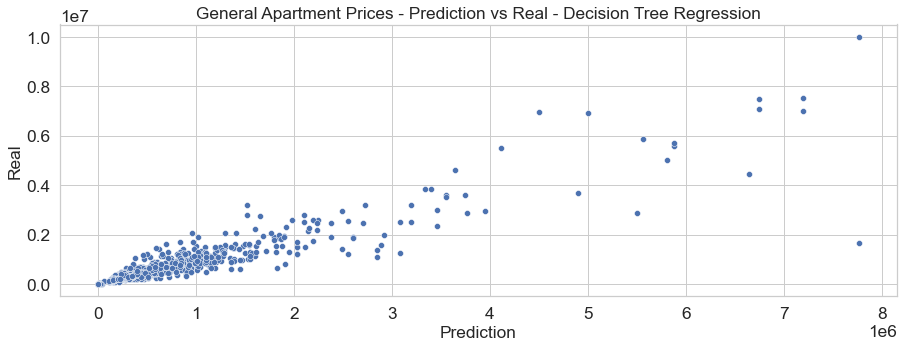

In [140]:
sns.scatterplot(x=y_pred_tree, y=y_test)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('General Apartment Prices - Prediction vs Real - Decision Tree Regression')

Text(0.5, 1.0, 'Apartment Sale Prices - Prediction vs Real - Decision Tree Regression')

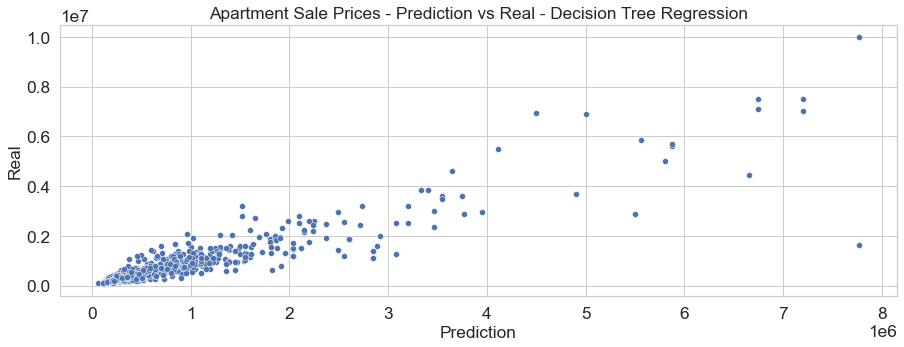

In [141]:
sns.scatterplot(x=y_pred_tree[mask_sale_test], y=y_test[mask_sale_test])
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Apartment Sale Prices - Prediction vs Real - Decision Tree Regression')

Text(0.5, 1.0, 'Apartment Rent Prices - Prediction vs Real - Decision Tree Regression')

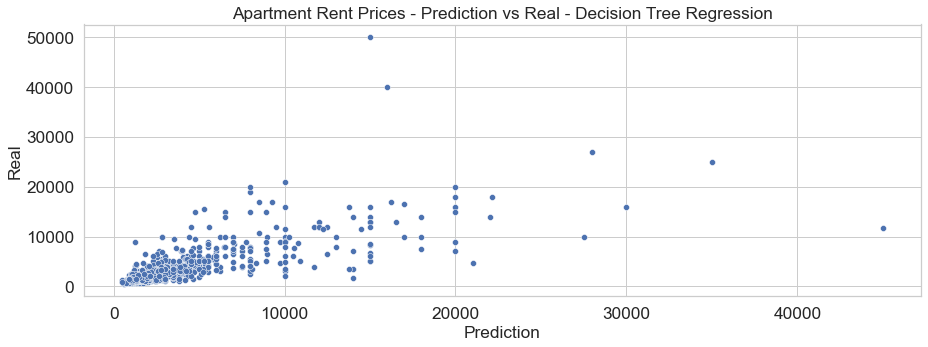

In [142]:
sns.scatterplot(x=y_pred_tree[mask_rent_test], y=y_test[mask_rent_test])
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Apartment Rent Prices - Prediction vs Real - Decision Tree Regression')

Text(0.5, 1.0, 'General Apartment Prices - Prediction vs Residual |')

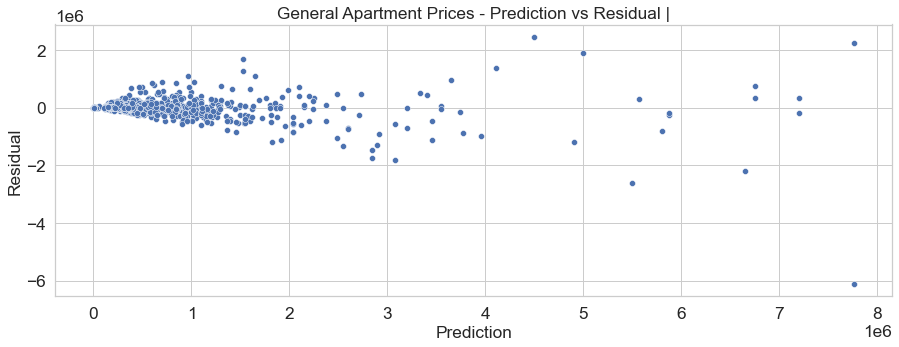

In [143]:
residual_tree_reg = y_test - y_pred_tree

sns.scatterplot(x=y_pred_tree, y=residual_tree_reg)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('General Apartment Prices - Prediction vs Residual |')

Text(0.5, 1.0, 'Apartment Sale Prices - Prediction vs Residual |')

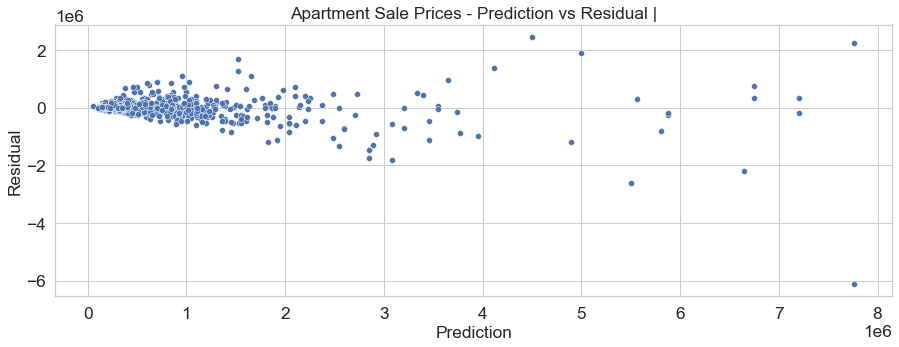

In [144]:
residual_tree_reg_sale = y_test[mask_sale_test] - y_pred_tree[mask_sale_test]

sns.scatterplot(x=y_pred_tree[mask_sale_test], y=residual_tree_reg_sale)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Apartment Sale Prices - Prediction vs Residual |')

Text(0.5, 1.0, 'Apartment Rent Prices - Prediction vs Residual |')

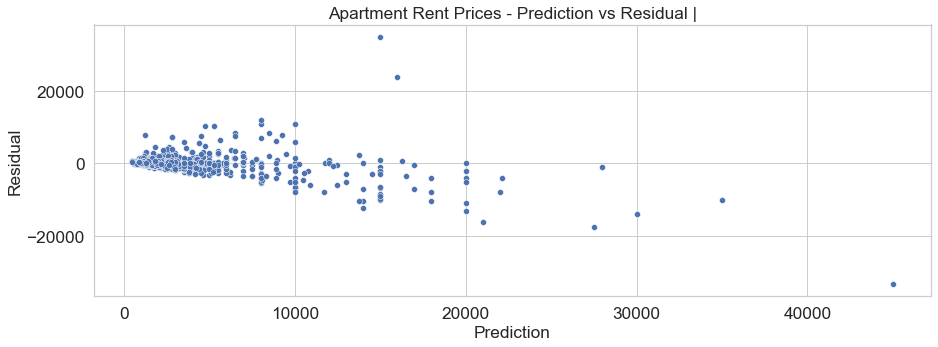

In [145]:
residual_tree_reg_rent = y_test[mask_rent_test] - y_pred_tree[mask_rent_test]

sns.scatterplot(x=y_pred_tree[mask_rent_test], y=residual_tree_reg_rent)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Apartment Rent Prices - Prediction vs Residual |')

### 7.3. Comparing our model with the Baseline

In the Section 1.2. we have our Baseline, which the description is a bit vague. We only have an approximation: their estimates were off by more than 20%. <br/>
We do not have a concrete **error** for the baseline. <br/>

To overcome this, we will consider that the baseline estimates final apartment prices between **20% and 25% more** than they actually are. .

In [146]:
np.random.seed(27)

In [147]:
y_test_pred_baseline = []

for true_apartment_price in y_test:
    error_rate = 1 + np.random.randint(20, 26) / 100
    y_test_pred_baseline.append(true_apartment_price * error_rate)
    
y_test_pred_baseline = np.array(y_test_pred_baseline)

#### RMSE

In [148]:
baseline_rmse_test = mean_squared_error(y_test, y_test_pred_baseline, squared=False)
print(f'RMSE Baseline in the Test Set: {baseline_rmse_test}')

RMSE Baseline in the Test Set: 158910.2794440401


In [149]:
baseline_rmse_test_sale = mean_squared_error(y_test[mask_sale_test], y_test_pred_baseline[mask_sale_test], squared=False)
print(f'RMSE Baseline in the Sale Test Set: {baseline_rmse_test_sale}')

baseline_rmse_test_rent = mean_squared_error(y_test[mask_rent_test], y_test_pred_baseline[mask_rent_test], squared=False)
print(f'RMSE Baseline in the Sale Test Set: {baseline_rmse_test_rent}')

RMSE Baseline in the Sale Test Set: 228668.64290765356
RMSE Baseline in the Sale Test Set: 1029.244492680709


### Discussion

The final performance of our tree regression model (**R\\$ 224,725.64**) is not better than the experts’ price estimates (**R\\$159,910.28**), which were often off by about 20%. When we compare the split `Negotiation Type` error rates, we are still behind the experts: (**R\\$2,455.46**) against (**R\\$1,029.24**) for apartments for Rent and (**R\\$ 323,369.12**.) against (**R\\$228,668.64**.) for apartments on Sale.

Therefore, it is not prepared to launch in production. We need to find a better model.

We may follow some strategies to find a better model than our current ones:
- Evaluate many other different models/algorithms (_e.g., SVM regression)
- Try some more alternatives in the fine-tunning step
- Try ensemble methods

After all, a model with a score similar to the baseline might be enough. Even though it is not more accurate (or with a lower error) than the baseline, the fact that the model is automatic will frees up some time for the experts so they can work on more interesting and productive tasks.

Also, considering that it can reduce the costs for customers, a similar Machine Learning solution is even more encouraged to be used in replacement of the experts.